In [257]:
import pandas as pd
import numpy as np
import datetime
pd.options.display.max_columns=100

In [258]:
#Number of entries
PolicyCount=15000
#9 year period
YearEndCap=2017
YearStartCap=2007

#dates
DateEndCap=datetime.date(YearEndCap, 12,31)
DateStartCap=datetime.date(YearStartCap,12,31)


In [259]:
### Create Main DataFrame filled with Nans

# Establish initial data-frame
columns_1=['Insured_ID', 'Insured_Date', 'Claims_Number', 'Claims_Amount', 'Transaction_Date',
'Insured_Year', 'Insured_Quarter', 'Transaction_Year', 'Transaction_Quarter']
ClaimsData=pd.DataFrame(columns=columns_1)

In [260]:
# Insured_ID's

ClaimsData['Insured_ID']=list(range(1,PolicyCount+1))
print(ClaimsData['Insured_ID'])

0            1
1            2
2            3
3            4
4            5
         ...  
14995    14996
14996    14997
14997    14998
14998    14999
14999    15000
Name: Insured_ID, Length: 15000, dtype: int64


In [261]:
# Insured_date's
# Random distribution
import random
for row in range(0, PolicyCount):
    n_days=(DateEndCap-DateStartCap).days
    random_days=random.randint(0,n_days-1)
    Random_Insured_Date=DateStartCap+datetime.timedelta(days=1)+datetime.timedelta\
        (days=random_days)
    ClaimsData.loc[row, 'Insured_Date']=Random_Insured_Date
print(ClaimsData['Insured_Date'])

0        2009-01-08
1        2011-07-18
2        2014-02-02
3        2011-11-05
4        2011-03-24
            ...    
14995    2012-08-29
14996    2015-11-18
14997    2016-08-10
14998    2016-08-03
14999    2009-12-10
Name: Insured_Date, Length: 15000, dtype: object


In [262]:
#Claims_Number's
#Poisson random distribution
#Poisson parameters
Lambda=10
Size=1
for row in range(0, PolicyCount):
    ClaimCount=np.random.poisson(1,1)
    ClaimsData.loc[row, 'Claims_Number']=ClaimCount

#Remove the square brackes (i.e.a list within a list) by passing into a list & back into df again
ClaimsData['Claims_Number']=pd.DataFrame(ClaimsData['Claims_Number'].values.tolist())
print(ClaimsData['Claims_Number'])

0        0
1        0
2        1
3        3
4        2
        ..
14995    3
14996    0
14997    0
14998    0
14999    0
Name: Claims_Number, Length: 15000, dtype: int32


In [263]:
### Special Case if need to simulate claims amount minimum& maximum limit. E.g. Reinsurance cases XOL

import random

def trunc_amt(mu, sigma, bottom, top):
    a=random.lognormal(mu, sigma)
    while(bottom <=a<=top)==False:
        a=random.lognormal(mu,sigma)
    return a

In [264]:
# Claims_Amount's 
# Gaussian random distribution 
# Gaussian parameters

MeanClaimAmt=10
StdDevClaimAmt=4
for row in range(0, PolicyCount):
    if ClaimsData.loc[row, 'Claims_Number']==0:
        #Impute 0 so that Claimamount is 0
        ClaimsData.loc[row, 'Claims_Amount']=0
    else:
        ClaimNumber=ClaimsData.loc[row, 'Claims_Number']
        num=np.random.lognormal(MeanClaimAmt, StdDevClaimAmt, ClaimNumber).sum()
        ClaimsData.loc[row, 'Claims_Amount']=num



#Remove the square brackets (i.e.a list within a list ) by passing into a list &back into df again
ClaimsData['Claims_Amount']=pd.DataFrame(ClaimsData['Claims_Amount']. values.tolist())
print(ClaimsData['Claims_Amount'])

0        0.000000e+00
1        0.000000e+00
2        5.505261e+04
3        2.396259e+06
4        2.416109e+06
             ...     
14995    2.209264e+05
14996    0.000000e+00
14997    0.000000e+00
14998    0.000000e+00
14999    0.000000e+00
Name: Claims_Amount, Length: 15000, dtype: float64


In [265]:
import random 
for row in range(0, PolicyCount):
    DateStart=ClaimsData.loc[row, 'Insured_Date']
    if ClaimsData.loc[row, 'Claims_Number']==0:
        #Impute InsuredDate so that Lag(i.e.Development Period) will be 0
        ClaimsData.loc[row, 'Transaction_Date']=DateStart
    elif (DateEndCap-DateStart).days<=0:
        ClaimsData.loc[row, 'Transaction_Date']=DateStart 
    else:
        n_days=(DateEndCap-DateStart).days 
        random_days=random.randint(1,n_days) #Min 1day to avoid conflict of zero days and no claims
        Random_Transaction_Date=DateStart+datetime.timedelta(days=random_days)
        ClaimsData.loc[row, 'Transaction_Date']=Random_Transaction_Date 
print(ClaimsData['Transaction_Date'])

     


0        2009-01-08
1        2011-07-18
2        2016-03-09
3        2015-10-30
4        2014-12-31
            ...    
14995    2014-05-17
14996    2015-11-18
14997    2016-08-10
14998    2016-08-03
14999    2009-12-10
Name: Transaction_Date, Length: 15000, dtype: object


In [266]:
display(ClaimsData.head(10))

,Insured_ID,Insured_Date,Claims_Number,Claims_Amount,Transaction_Date,Insured_Year,Insured_Quarter,Transaction_Year,Transaction_Quarter
0,1,2009-01-08,0,0.000000e+00,2009-01-08,NaN,NaN,NaN,NaN
1,2,2011-07-18,0,0.000000e+00,2011-07-18,NaN,NaN,NaN,NaN
2,3,2014-02-02,1,5.505261e+04,2016-03-09,NaN,NaN,NaN,NaN
3,4,2011-11-05,3,2.396259e+06,2015-10-30,NaN,NaN,NaN,NaN
4,5,2011-03-24,2,2.416109e+06,2014-12-31,NaN,NaN,NaN,NaN
5,6,2010-07-06,1,1.859759e+03,2015-09-20,NaN,NaN,NaN,NaN
6,7,2015-09-19,0,0.000000e+00,2015-09-19,NaN,NaN,NaN,NaN
7,8,2016-11-02,1,7.903684e+04,2017-09-16,NaN,NaN,NaN,NaN
8,9,2009-10-21,0,0.000000e+00,2009-10-21,NaN,NaN,NaN,NaN
9,10,2017-09-15,3,2.748096e+05,2017-09-26,NaN,NaN,NaN,NaN


In [267]:
#Extract & Impute Date Components 
# JAN-MAR=1, APR-JUn=2, July-Sep=3, Oct-Dec=4
#Insured Year

ClaimsData['Insured_Year']=ClaimsData['Insured_Date'].apply(lambda x: x.year)
ClaimsData['Transaction_Year']=ClaimsData['Transaction_Date'].apply(lambda x:x.year)

#Insured Month
ClaimsData['Insured_Quarter']=ClaimsData['Insured_Date'].apply(lambda x: x.month)
ClaimsData['Transaction_Quarter']=ClaimsData['Transaction_Date'].apply(lambda x: x.month)

print(ClaimsData[['Insured_Date', 'Insured_Year', 'Transaction_Date', 'Transaction_Year']])






      Insured_Date  Insured_Year Transaction_Date  Transaction_Year
0       2009-01-08          2009       2009-01-08              2009
1       2011-07-18          2011       2011-07-18              2011
2       2014-02-02          2014       2016-03-09              2016
3       2011-11-05          2011       2015-10-30              2015
4       2011-03-24          2011       2014-12-31              2014
...            ...           ...              ...               ...
14995   2012-08-29          2012       2014-05-17              2014
14996   2015-11-18          2015       2015-11-18              2015
14997   2016-08-10          2016       2016-08-10              2016
14998   2016-08-03          2016       2016-08-03              2016
14999   2009-12-10          2009       2009-12-10              2009

[15000 rows x 4 columns]


In [268]:
#Year only lag
# ClaimsData.drop(columns=['Year_only_Lag'], axis=1, inplace=True)
ClaimsData['Year_Only_Lag']=ClaimsData['Transaction_Year']-ClaimsData['Insured_Year']
print(ClaimsData)

       Insured_ID Insured_Date  Claims_Number  Claims_Amount Transaction_Date  \
0               1   2009-01-08              0   0.000000e+00       2009-01-08   
1               2   2011-07-18              0   0.000000e+00       2011-07-18   
2               3   2014-02-02              1   5.505261e+04       2016-03-09   
3               4   2011-11-05              3   2.396259e+06       2015-10-30   
4               5   2011-03-24              2   2.416109e+06       2014-12-31   
...           ...          ...            ...            ...              ...   
14995       14996   2012-08-29              3   2.209264e+05       2014-05-17   
14996       14997   2015-11-18              0   0.000000e+00       2015-11-18   
14997       14998   2016-08-10              0   0.000000e+00       2016-08-10   
14998       14999   2016-08-03              0   0.000000e+00       2016-08-03   
14999       15000   2009-12-10              0   0.000000e+00       2009-12-10   

       Insured_Year  Insure

In [269]:
#Compile past claims data
#incremental claims amount
py_data=ClaimsData['Claims_Amount'].groupby([ClaimsData['Insured_Year'], ClaimsData['Year_Only_Lag']]).sum().reset_index()
#Convert into dataframe

py_data=pd.DataFrame(py_data)

#cumulative claims amount

py_data['cumsum']=py_data['Claims_Amount'].groupby(py_data['Insured_Year']).cumsum()

print(py_data)

    Insured_Year  Year_Only_Lag  Claims_Amount        cumsum
0           2008              0   7.176101e+08  7.176101e+08
1           2008              1   2.206036e+10  2.277797e+10
2           2008              2   2.268944e+08  2.300486e+10
3           2008              3   2.393840e+10  4.694326e+10
4           2008              4   7.243015e+10  1.193734e+11
5           2008              5   6.750176e+10  1.868752e+11
6           2008              6   8.992560e+09  1.958677e+11
7           2008              7   4.535904e+08  1.963213e+11
8           2008              8   1.407581e+10  2.103971e+11
9           2008              9   7.043617e+09  2.174407e+11
10          2009              0   2.750925e+08  2.750925e+08
11          2009              1   1.094493e+09  1.369586e+09
12          2009              2   7.603963e+09  8.973549e+09
13          2009              3   7.469480e+08  9.720497e+09
14          2009              4   3.290068e+09  1.301056e+10
15          2009        

In [270]:
# Establish Inflation Index 
# create data-frame of cumulative inflation rates 

columns_2=['Year', 'CumPastInflation']
Inflation_df=pd.DataFrame(columns=columns_2)
#past inflation years

Inflation_df['Year']=[2008,2009,2010, 2011, 2012,2013,2014,2015,2016,2017,2018]

#past inflation index
Inflation_df['CumPastInflation']=[1.32, 1.27, 1.28, 1.22, 1.16,1.12,1.09, 1.07,1.05,1.04,1.00]

display(Inflation_df)


,Year,CumPastInflation
0,2008,1.32
1,2009,1.27
2,2010,1.28
3,2011,1.22
4,2012,1.16
5,2013,1.12
6,2014,1.09
7,2015,1.07
8,2016,1.05
9,2017,1.04


In [271]:
#uplift (past inflation) for inceremental claims


py_data['Inflated_Claims_Amount']=py_data['Claims_Amount']

for row in range(0, len(py_data['Insured_Year'])):
    InsuredYear=py_data.loc[row, 'Insured_Year']
    LagYear=py_data.loc[row,'Year_Only_Lag']
    TransactionYear=InsuredYear+LagYear 
    for year in range(0, len(Inflation_df['Year'])):
        CurrentYearInflation=Inflation_df.loc[year,'Year']
        if CurrentYearInflation==InsuredYear :
            CurrentYearPerc=Inflation_df.loc[Inflation_df['Year']==TransactionYear, 'CumPastInflation']
            ToYearPerc=Inflation_df.loc[Inflation_df['Year']==YearEndCap, 'CumPastInflation'].values[0]
            Uplift=ToYearPerc/CurrentYearPerc 
            py_data['Inflated_Claims_Amount'][row]=py_data['Inflated_Claims_Amount'][row]*Uplift
        else:
            py_data['Inflated_Claims_Amount'][row]=py_data['Inflated_Claims_Amount'][row]



print(py_data) 


c:\Temp\ipykernel_6100\1683301784.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  py_data['Inflated_Claims_Amount'][row]=py_data['Inflated_Claims_Amount'][row]*Uplift
c:\Temp\ipykernel_6100\1683301784.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  py_data['Inflated_Claims_Amount'][row]=py_data['Inflated_Claims_Amount'][row]


    Insured_Year  Year_Only_Lag  Claims_Amount        cumsum  \
0           2008              0   7.176101e+08  7.176101e+08   
1           2008              1   2.206036e+10  2.277797e+10   
2           2008              2   2.268944e+08  2.300486e+10   
3           2008              3   2.393840e+10  4.694326e+10   
4           2008              4   7.243015e+10  1.193734e+11   
5           2008              5   6.750176e+10  1.868752e+11   
6           2008              6   8.992560e+09  1.958677e+11   
7           2008              7   4.535904e+08  1.963213e+11   
8           2008              8   1.407581e+10  2.103971e+11   
9           2008              9   7.043617e+09  2.174407e+11   
10          2009              0   2.750925e+08  2.750925e+08   
11          2009              1   1.094493e+09  1.369586e+09   
12          2009              2   7.603963e+09  8.973549e+09   
13          2009              3   7.469480e+08  9.720497e+09   
14          2009              4   3.2900

In [272]:
#get uplift (past inflation) Cumalative claims

py_data['Inflated_cumsum']=py_data['Inflated_Claims_Amount'].groupby(py_data['Insured_Year']).cumsum()

In [273]:
py_data['Inflated_LossDF']=1

for row in range(0, len(py_data['Insured_Year'])):
    InsuredYear=py_data.loc[row,'Insured_Year']
    LagYr=py_data.loc[row,'Year_Only_Lag']
    CurrentYear=py_data.loc[row,'Insured_Year']+py_data.loc[row, 'Year_Only_Lag']
    CurrCumAmt=py_data.loc[row, 'Inflated_cumsum']

    if CurrentYear>YearEndCap or len(py_data.loc[(py_data['Insured_Year']==InsuredYear)&(
        py_data['Year_Only_Lag']==(LagYr+1)), 'Inflated_cumsum'])==0:
        NextCumAmt=0
    else:
        NextCumAmt=py_data.loc[(py_data['Insured_Year']==InsuredYear)&(
            py_data['Year_Only_Lag']==(LagYr+1)), 'Inflated_cumsum'].values[0]

    LDF=NextCumAmt/CurrCumAmt 
    py_data.loc[row, 'Inflated_LossDF']=LDF 



print(py_data['Inflated_LossDF'])

0      32.951719
1       1.009895
2       2.084592
3       2.655661
4       1.601775
5       1.051427
6       1.002513
7       1.079278
8       1.037110
9       0.000000
10      4.947554
11      6.815869
12      1.088155
13      1.369581
14      1.157401
15      1.091577
16      1.899609
17      1.088604
18      0.000000
19    123.441261
20      1.208209
21      1.238815
22      1.024704
23      1.039035
24      1.163880
25      1.076717
26      0.000000
27     65.398235
28      1.024123
29      1.018994
30      1.276877
31      1.026390
32      1.052046
33      0.000000
34      1.419267
35      1.882983
36      2.320910
37      1.272073
38      1.350891
39      0.000000
40      1.634638
41      1.058032
42      1.111026
43      1.050925
44      0.000000
45      3.030531
46      1.442594
47      8.971578
48      0.000000
49      2.946348
50      3.955207
51      0.000000
52      1.658826
53      0.000000
54      0.000000
Name: Inflated_LossDF, dtype: float64


In [274]:
#Non Inflated
py_data['LossDF']=1

for row in range(0, len(py_data['Insured_Year'])):
    InsuredYear=py_data.loc[row, 'Insured_Year']
    LagYr=py_data.loc[row, 'Year_Only_Lag']
    CurrentYear=py_data.loc[row, 'Insured_Year']+py_data.loc[row, 'Year_Only_Lag']
    CurrCumAmt=py_data.loc[row, 'cumsum']


    if CurrentYear>YearEndCap or len(py_data.loc[(py_data['Insured_Year']==InsuredYear)&(
        py_data['Year_Only_Lag']==(LagYr+1)), 'cumsum'])==0:
        NextCumAmt=0
    
    else:
        #.values[0] code to output only values and not entire row
        NextCumAmt=py_data.loc[
            (py_data['Insured_Year']==InsuredYear)&(py_data['Year_Only_Lag']==(LagYr+1)), 'cumsum'].values[0]
    LDF=NextCumAmt/CurrCumAmt
    py_data.loc[row,'LossDF']=LDF 

print(py_data['LossDF'])


0      31.741427
1       1.009961
2       2.040580
3       2.542930
4       1.565467
5       1.048121
6       1.002316
7       1.071698
8       1.033478
9       0.000000
10      4.978637
11      6.552017
12      1.083239
13      1.338467
14      1.143550
15      1.082979
16      1.806260
17      1.082719
18      0.000000
19    117.701827
20      1.197891
21      1.221040
22      1.022577
23      1.035092
24      1.145123
25      1.068392
26      0.000000
27     62.231109
28      1.023273
29      1.017848
30      1.255693
31      1.024318
32      1.047600
33      0.000000
34      1.404809
35      1.838238
36      2.260928
37      1.261625
38      1.336971
39      0.000000
40      1.617638
41      1.056024
42      1.105381
43      1.048119
44      0.000000
45      2.993274
46      1.431659
47      8.759398
48      0.000000
49      2.909968
50      3.908261
51      0.000000
52      1.652551
53      0.000000
54      0.000000
Name: LossDF, dtype: float64


In [275]:
"""Claims Data - Single Plot"""
def SinglePlotPartialClaims(DataFrameName, InsuredYearColumn, LagYearColumn, ValueColumn):
    import matplotlib.pyplot as plt
    """Create New df"""
    Filtered_NewColumnNames = ["Insured_Year","Year_Only_Lag","ClaimAmt"]
    Filtered_df = pd.DataFrame(DataFrameName[[InsuredYearColumn, LagYearColumn, ValueColumn]])
    Filtered_df.columns = Filtered_NewColumnNames
    """Unique Insured Years List"""
    InsuredYr_List = list(DataFrameName[InsuredYearColumn].unique())
    """Unique Lag Years List"""
    LagYr_List = list(DataFrameName[LagYearColumn].unique())
    """Color List"""
    ALL_Colors = ['r','b','g','y','k', 'c', 'm', 'saddlebrown', 'pink', 'lawngreen']         
    Color_List = ALL_Colors[:len(InsuredYr_List)]
    """LineStyle List"""
    ALL_LineStyle = ['-', '--', '-.', ':','-','-','-','-','-','-','-','-','-']
    LineStyle_List = ALL_LineStyle[:len(InsuredYr_List)]
    """MarkerStyle List"""# First 4x empty 
    ALL_Markers = ['','','','','^','.','o','*', '+', '1', '2', '3', '4']
    Marker_List = ALL_Markers[:len(InsuredYr_List)]
    """Loop Plot"""
    for row_A in range(0,len(InsuredYr_List)):
        plt.figure(2, figsize=(10,5))
        Year_i = InsuredYr_List[row_A]
        SubFiltered_df = Filtered_df.loc[Filtered_df['Insured_Year'].isin([Year_i])]
        plt.plot(SubFiltered_df['Year_Only_Lag'], SubFiltered_df['ClaimAmt'], 
                 label=str(Year_i), linestyle='-', color=Color_List[row_A])
    """Plot Attributes"""    
    plt.xlabel('Developement Year')
    plt.ylabel('Claims Value')
    plt.title('Single Plot Partial Claims Data')
    plt.legend()
    plt.show()

In [276]:
"""Claims Data - Sub Plot"""
def SubPlotPartialClaims(DataFrameName, InsuredYearColumn, LagYearColumn, ValueColumn):
    import matplotlib.pyplot as plt
    from matplotlib import rcParams
    """Create New df"""
    Filtered_NewColumnNames = ["Insured_Year","Year_Only_Lag","ClaimAmt"]
    Filtered_df = pd.DataFrame(DataFrameName[[InsuredYearColumn, LagYearColumn, ValueColumn]])
    Filtered_df.columns = Filtered_NewColumnNames
    """Unique Insured Years List"""
    InsuredYr_List = list(DataFrameName[InsuredYearColumn].unique())
    """Unique Lag Years List"""
    LagYr_List = list(DataFrameName[LagYearColumn].unique())
    """Color List"""
    ALL_Colors = ['r','b','g','y','k', 'c', 'm', 'saddlebrown', 'pink', 'lawngreen']         
    Color_List = ALL_Colors[:len(InsuredYr_List)]
    """LineStyle List"""
    ALL_LineStyle = ['-', '--', '-.', ':','-','-','-','-','-','-','-','-','-']
    LineStyle_List = ALL_LineStyle[:len(InsuredYr_List)]
    """MarkerStyle List"""# First 4x empty 
    ALL_Markers = ['','','','','^','.','o','*', '+', '1', '2', '3', '4']
    Marker_List = ALL_Markers[:len(InsuredYr_List)]
    """Plot Attributes"""
    fig = plt.figure(2, figsize=(10,14))
    plt.xticks([]) # remove initial blank plot default ticks
    plt.yticks([]) # remove initial blank plot default ticks
    plt.title('Sub Plot Partial Claims Data')
    rcParams['axes.titlepad'] = 70 # position title
    plt.box(on=None) # Remove boundary line
    """Loop Plot"""
    i=0
    for row_A in range(0,len(InsuredYr_List)):
        ax = fig.add_subplot(5, 2, 1+i)
        Year_i = InsuredYr_List[row_A]
        SubFiltered_df = Filtered_df.loc[Filtered_df['Insured_Year'].isin([Year_i])]
        plt.plot(SubFiltered_df['Year_Only_Lag'], SubFiltered_df['ClaimAmt'], 
                 label=str(Year_i), marker='o', linestyle='-', color=Color_List[row_A])
        plt.xticks(np.arange(0, (YearEndCap-YearStartCap), step=1))
        plt.legend()
        i += 1
        """Plot Attributes"""
        plt.xlabel('Developement Year')
        plt.ylabel('Claims Value')
    
    fig.tight_layout() # set size
    plt.show()

In [277]:
"""Loss Development Ratios"""
def SinglePlotLDF(DataFrameName, Columns):
    import matplotlib.pyplot as  plt
    """Create New df"""
    Filtered_df = pd.DataFrame(DataFrameName[Columns])    
    """Lag Years"""
    LagYears_List = list(range(0, len(DataFrameName)))
    """Color List"""
    ALL_Colors = ['r','b','g','y','k', 'c', 'm', 'saddlebrown', 'pink', 'lawngreen']         
    Color_List = ALL_Colors[:len(Columns)]
    """Loop Plot"""
    plt.figure(2, figsize=(10,5))
    for row_A in range(0,len(Columns)):
        Column_i = Columns[row_A]
        plt.plot(LagYears_List, Filtered_df[Column_i], label=str(Column_i), linestyle='-', color=Color_List[row_A])
        plt.legend()         
    """Plot Attributes"""    
    plt.xlabel('Developement Year')
    plt.ylabel('Ratio')
    plt.title('Loss Development Factors')
    plt.show()

c:\Temp\ipykernel_6100\859367259.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(py_data['Inflated_Claims_Amount'], kde=False, fit=stats.lognorm) # norm, pareto, loggamma, gompertz


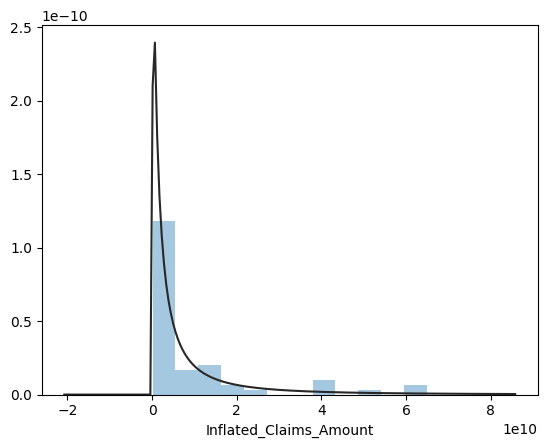

Inflated_Claims_Amount                              \
Year_Only_Lag                      0             1             2   
Insured_Year                                                       
2008                    5.653897e+08  1.806517e+10  1.843517e+08   
2009                    2.252726e+08  8.892758e+08  6.482067e+09   
2010                    1.194252e+08  1.462257e+10  3.069420e+09   
2011                    6.340028e+08  4.082866e+10  1.000193e+09   
2012                    1.444762e+09  6.057407e+08  1.810559e+09   
2013                    1.395870e+10  8.858715e+09  1.324138e+09   
2014                    1.448067e+09  2.940344e+09  1.942284e+09   
2015                    4.717714e+09  9.182313e+09  4.107746e+10   
2016                    2.189581e+10  1.442552e+10           NaN   
2017                    3.855925e+10           NaN           NaN   

                                                                       \
Year_Only_Lag             3             4             5             6   
Insured_Year                                                            
2008           2.040651e+10  6.493738e+10  6.268020e+10  8.580057e+09   
2009           6.696775e+08  3.055063e+09  1.781990e+09  1.199969e+09   
2010           4.253626e+09  5.450996e+08  8.825838e+08  3.849979e+09   
2011           8.065379e+08  1.198031e+10  1.458017e+09  2.951409e+09   
2012           5.100115e+09  2.438095e+09  3.999902e+09           NaN   
2013           2.680347e+09  1.365895e+09           NaN           NaN   
2014           5.046563e+10           NaN           NaN           NaN   
2015                    NaN           NaN           NaN           NaN   
2016                    NaN           NaN           NaN           NaN   
2017                    NaN           NaN           NaN           NaN   

                                                         
Year_Only_Lag             7             8             9  
Insured_Year                                             
2008           4.408729e+08  1.394175e+10  7.043617e+09  
2009           1.286739e+10  2.407434e+09           NaN  
2010           2.097656e+09           NaN           NaN  
2011                    NaN           NaN           NaN  
2012                    NaN           NaN           NaN  
2013                    NaN           NaN           NaN  
2014                    NaN           NaN           NaN  
2015                    NaN           NaN           NaN  
2016                    NaN           NaN           NaN  
2017                    NaN           NaN           NaN

In [278]:
# Incremental Claims Amount
# Inflated
py_triangle_inflated = pd.pivot_table(py_data, index=["Insured_Year"], columns=["Year_Only_Lag"], values=["Inflated_Claims_Amount"])
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats, integrate
sns.distplot(py_data['Inflated_Claims_Amount'], kde=False, fit=stats.lognorm) # norm, pareto, loggamma, gompertz
plt.show()
display(py_triangle_inflated)

c:\Temp\ipykernel_6100\4095615795.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(py_data['Claims_Amount'], kde=False, fit=stats.lognorm) # norm, pareto, loggamma, gompertz


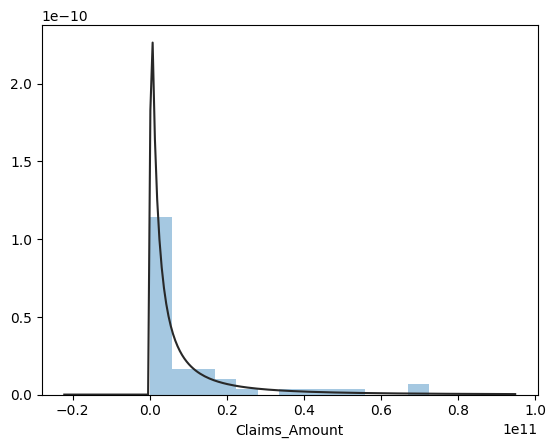

Claims_Amount                                            \
Year_Only_Lag             0             1             2             3   
Insured_Year                                                            
2008           7.176101e+08  2.206036e+10  2.268944e+08  2.393840e+10   
2009           2.750925e+08  1.094493e+09  7.603963e+09  7.469480e+08   
2010           1.469848e+08  1.715340e+10  3.423583e+09  4.580829e+09   
2011           7.437341e+08  4.553966e+10  1.077131e+09  8.453137e+08   
2012           1.611465e+09  6.523361e+08  1.897605e+09  5.247233e+09   
2013           1.503244e+10  9.284615e+09  1.362334e+09  2.706119e+09   
2014           1.517685e+09  3.025162e+09  1.960960e+09  5.046563e+10   
2015           4.853802e+09  9.270604e+09  4.107746e+10           NaN   
2016           2.210635e+10  1.442552e+10           NaN           NaN   
2017           3.855925e+10           NaN           NaN           NaN   

                                                                       \
Year_Only_Lag             4             5             6             7   
Insured_Year                                                            
2008           7.243015e+10  6.750176e+10  8.992560e+09  4.535904e+08   
2009           3.290068e+09  1.867663e+09  1.234584e+09  1.299111e+10   
2010           5.713063e+08  9.080430e+08  3.886998e+09  2.097656e+09   
2011           1.232590e+10  1.472036e+09  2.951409e+09           NaN   
2012           2.461538e+09  3.999902e+09           NaN           NaN   
2013           1.365895e+09           NaN           NaN           NaN   
2014                    NaN           NaN           NaN           NaN   
2015                    NaN           NaN           NaN           NaN   
2016                    NaN           NaN           NaN           NaN   
2017                    NaN           NaN           NaN           NaN   

                                           
Year_Only_Lag             8             9  
Insured_Year                               
2008           1.407581e+10  7.043617e+09  
2009           2.407434e+09           NaN  
2010                    NaN           NaN  
2011                    NaN           NaN  
2012                    NaN           NaN  
2013                    NaN           NaN  
2014                    NaN           NaN  
2015                    NaN           NaN  
2016                    NaN           NaN  
2017                    NaN           NaN

In [279]:
# Incremental Claims Amount
# Non-Inflated
py_triangle = pd.pivot_table(py_data, index=["Insured_Year"], columns=["Year_Only_Lag"], values=["Claims_Amount"])
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats, integrate
sns.distplot(py_data['Claims_Amount'], kde=False, fit=stats.lognorm) # norm, pareto, loggamma, gompertz
plt.show()
display(py_triangle)

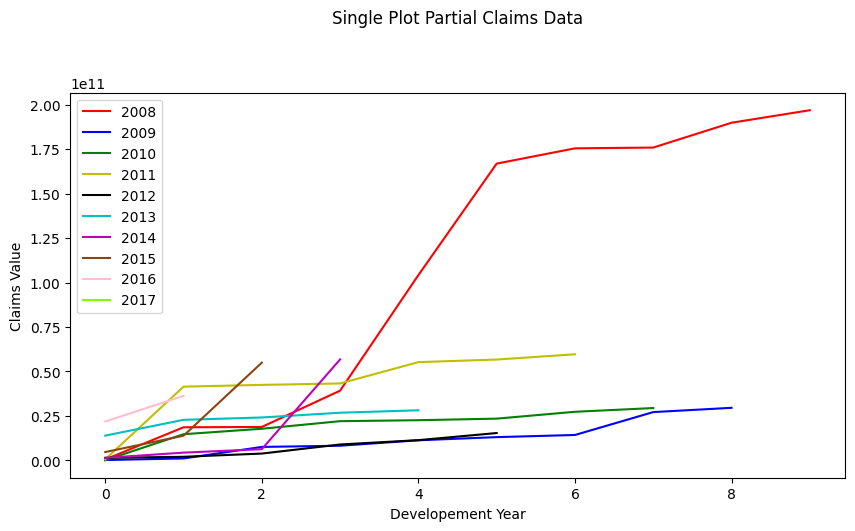

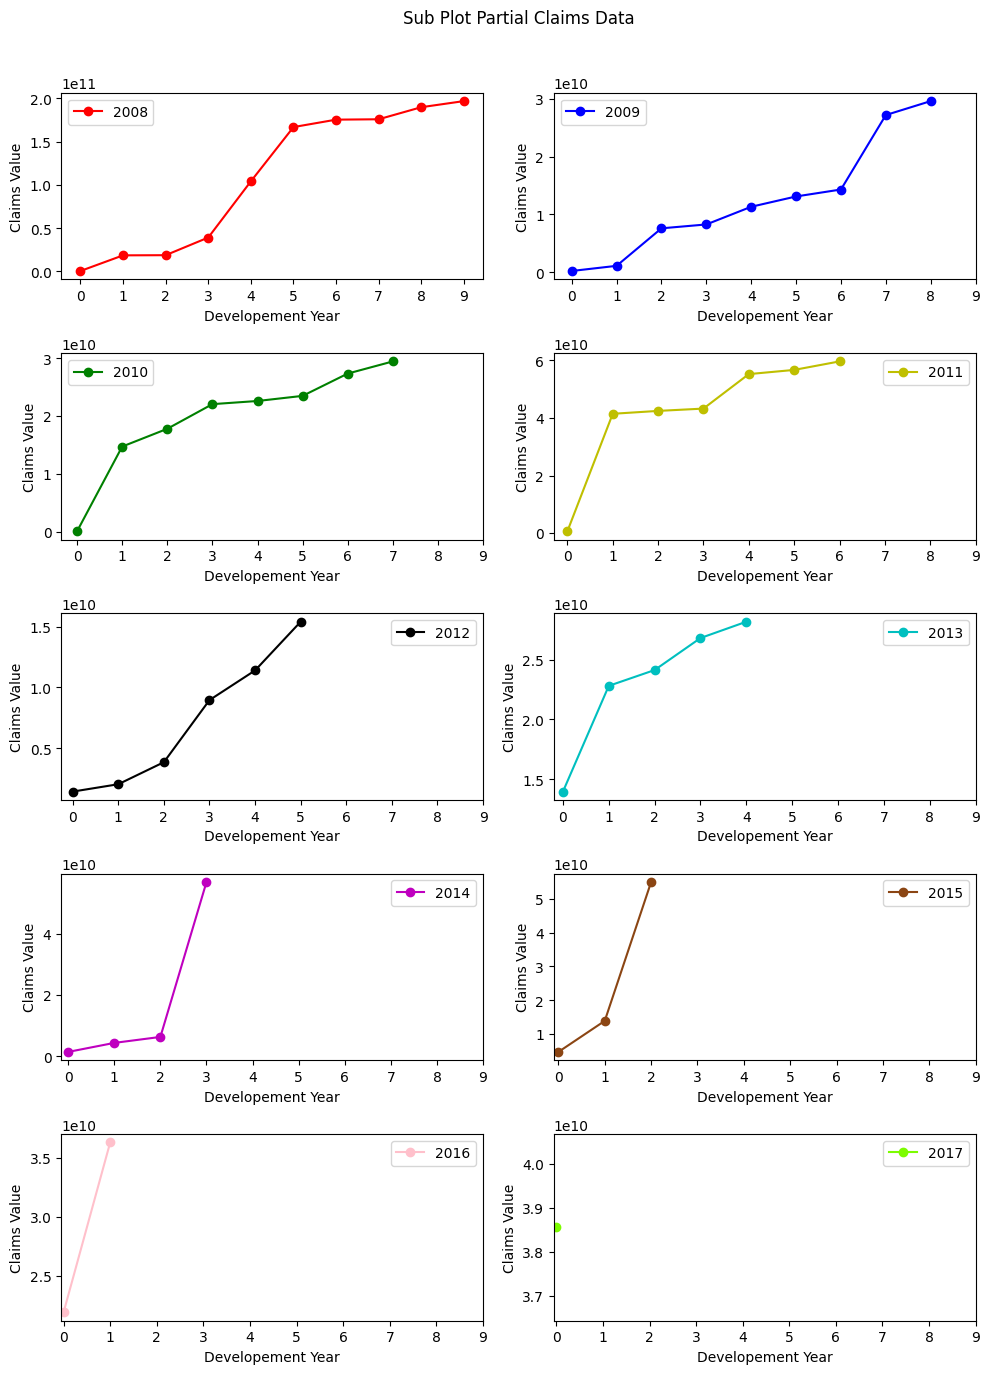

Inflated_cumsum                                            \
Year_Only_Lag               0             1             2             3   
Insured_Year                                                              
2008             5.653897e+08  1.863056e+10  1.881492e+10  3.922142e+10   
2009             2.252726e+08  1.114548e+09  7.596615e+09  8.266293e+09   
2010             1.194252e+08  1.474199e+10  1.781141e+10  2.206504e+10   
2011             6.340028e+08  4.146267e+10  4.246286e+10  4.326940e+10   
2012             1.444762e+09  2.050503e+09  3.861062e+09  8.961176e+09   
2013             1.395870e+10  2.281741e+10  2.414155e+10  2.682190e+10   
2014             1.448067e+09  4.388411e+09  6.330696e+09  5.679633e+10   
2015             4.717714e+09  1.390003e+10  5.497748e+10           NaN   
2016             2.189581e+10  3.632133e+10           NaN           NaN   
2017             3.855925e+10           NaN           NaN           NaN   

                                                                       \
Year_Only_Lag             4             5             6             7   
Insured_Year                                                            
2008           1.041588e+11  1.668390e+11  1.754191e+11  1.758599e+11   
2009           1.132136e+10  1.310335e+10  1.430332e+10  2.717070e+10   
2010           2.261014e+10  2.349272e+10  2.734270e+10  2.944036e+10   
2011           5.524971e+10  5.670773e+10  5.965913e+10           NaN   
2012           1.139927e+10  1.539917e+10           NaN           NaN   
2013           2.818779e+10           NaN           NaN           NaN   
2014                    NaN           NaN           NaN           NaN   
2015                    NaN           NaN           NaN           NaN   
2016                    NaN           NaN           NaN           NaN   
2017                    NaN           NaN           NaN           NaN   

                                           
Year_Only_Lag             8             9  
Insured_Year                               
2008           1.898017e+11  1.968453e+11  
2009           2.957814e+10           NaN  
2010                    NaN           NaN  
2011                    NaN           NaN  
2012                    NaN           NaN  
2013                    NaN           NaN  
2014                    NaN           NaN  
2015                    NaN           NaN  
2016                    NaN           NaN  
2017                    NaN           NaN

In [280]:
# Cumulative Claims Amount
# Inflated
py_triangle_cum_inflated = pd.pivot_table(py_data, index=["Insured_Year"], columns=["Year_Only_Lag"], values=["Inflated_cumsum"])
SinglePlotPartialClaims(DataFrameName=py_data, InsuredYearColumn='Insured_Year', LagYearColumn='Year_Only_Lag', ValueColumn='Inflated_cumsum')
SubPlotPartialClaims(DataFrameName=py_data, InsuredYearColumn='Insured_Year', LagYearColumn='Year_Only_Lag', ValueColumn='Inflated_cumsum')
display(py_triangle_cum_inflated)

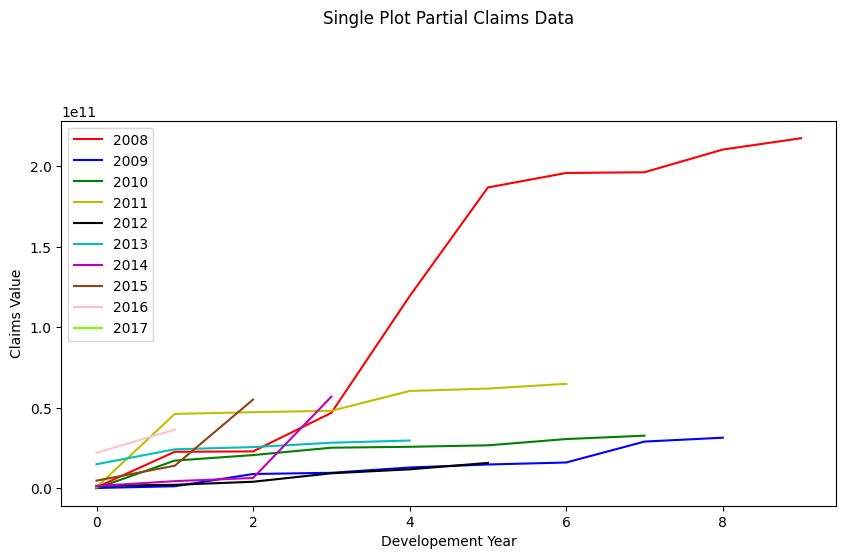

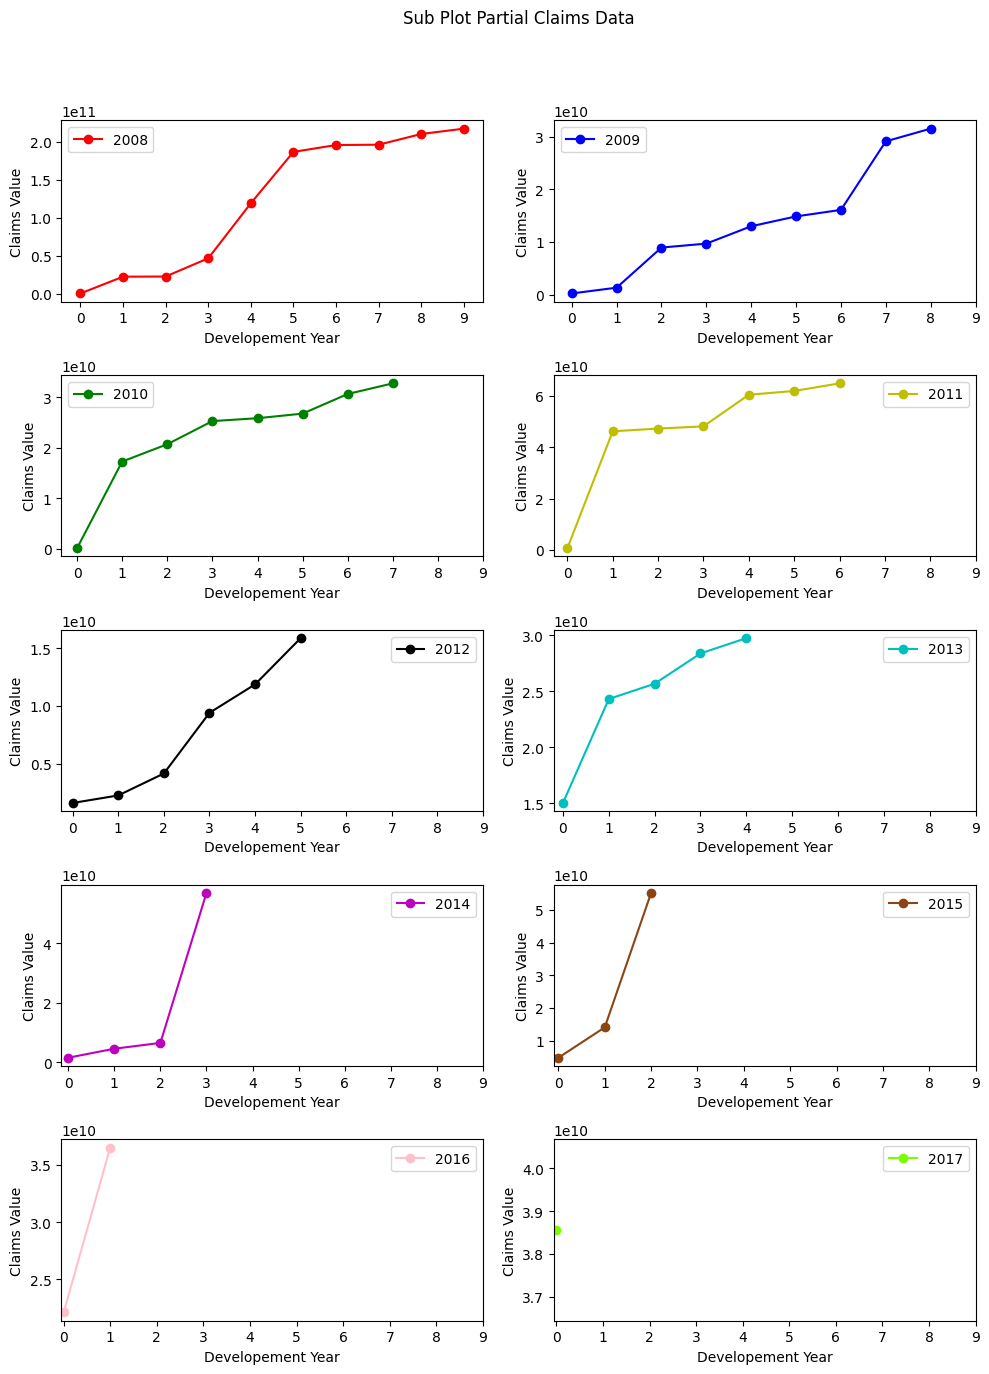

cumsum                                            \
Year_Only_Lag             0             1             2             3   
Insured_Year                                                            
2008           7.176101e+08  2.277797e+10  2.300486e+10  4.694326e+10   
2009           2.750925e+08  1.369586e+09  8.973549e+09  9.720497e+09   
2010           1.469848e+08  1.730038e+10  2.072397e+10  2.530479e+10   
2011           7.437341e+08  4.628340e+10  4.736053e+10  4.820584e+10   
2012           1.611465e+09  2.263802e+09  4.161406e+09  9.408640e+09   
2013           1.503244e+10  2.431706e+10  2.567939e+10  2.838551e+10   
2014           1.517685e+09  4.542847e+09  6.503808e+09  5.696944e+10   
2015           4.853802e+09  1.412441e+10  5.520186e+10           NaN   
2016           2.210635e+10  3.653187e+10           NaN           NaN   
2017           3.855925e+10           NaN           NaN           NaN   

                                                                       \
Year_Only_Lag             4             5             6             7   
Insured_Year                                                            
2008           1.193734e+11  1.868752e+11  1.958677e+11  1.963213e+11   
2009           1.301056e+10  1.487823e+10  1.611281e+10  2.910392e+10   
2010           2.587610e+10  2.678414e+10  3.067114e+10  3.276880e+10   
2011           6.053174e+10  6.200378e+10  6.495518e+10           NaN   
2012           1.187018e+10  1.587008e+10           NaN           NaN   
2013           2.975141e+10           NaN           NaN           NaN   
2014                    NaN           NaN           NaN           NaN   
2015                    NaN           NaN           NaN           NaN   
2016                    NaN           NaN           NaN           NaN   
2017                    NaN           NaN           NaN           NaN   

                                           
Year_Only_Lag             8             9  
Insured_Year                               
2008           2.103971e+11  2.174407e+11  
2009           3.151136e+10           NaN  
2010                    NaN           NaN  
2011                    NaN           NaN  
2012                    NaN           NaN  
2013                    NaN           NaN  
2014                    NaN           NaN  
2015                    NaN           NaN  
2016                    NaN           NaN  
2017                    NaN           NaN

In [281]:
# Cumulative Claims Amount
# Non-Inflated
py_triangle_cum = pd.pivot_table(py_data, index=["Insured_Year"], columns=["Year_Only_Lag"], values=["cumsum"])
SinglePlotPartialClaims(DataFrameName=py_data, InsuredYearColumn='Insured_Year', LagYearColumn='Year_Only_Lag', ValueColumn='cumsum')
SubPlotPartialClaims(DataFrameName=py_data, InsuredYearColumn='Insured_Year', LagYearColumn='Year_Only_Lag', ValueColumn='cumsum')
display(py_triangle_cum)

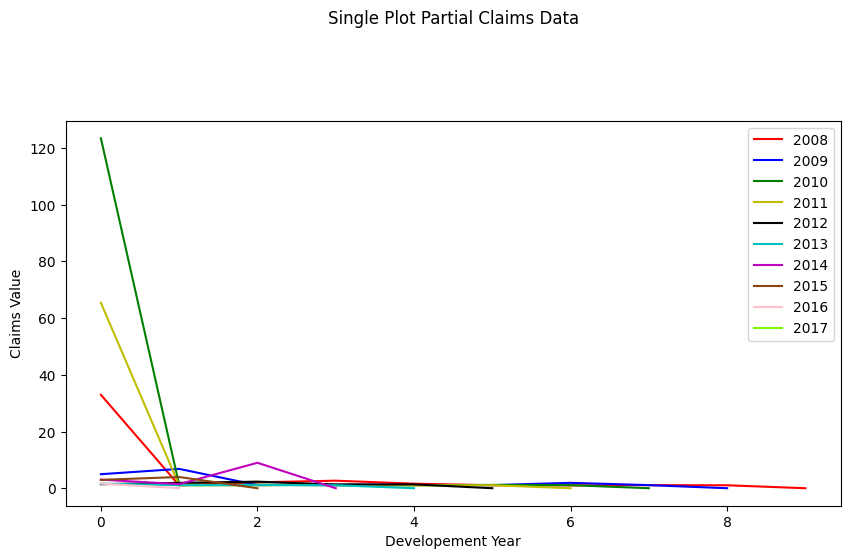

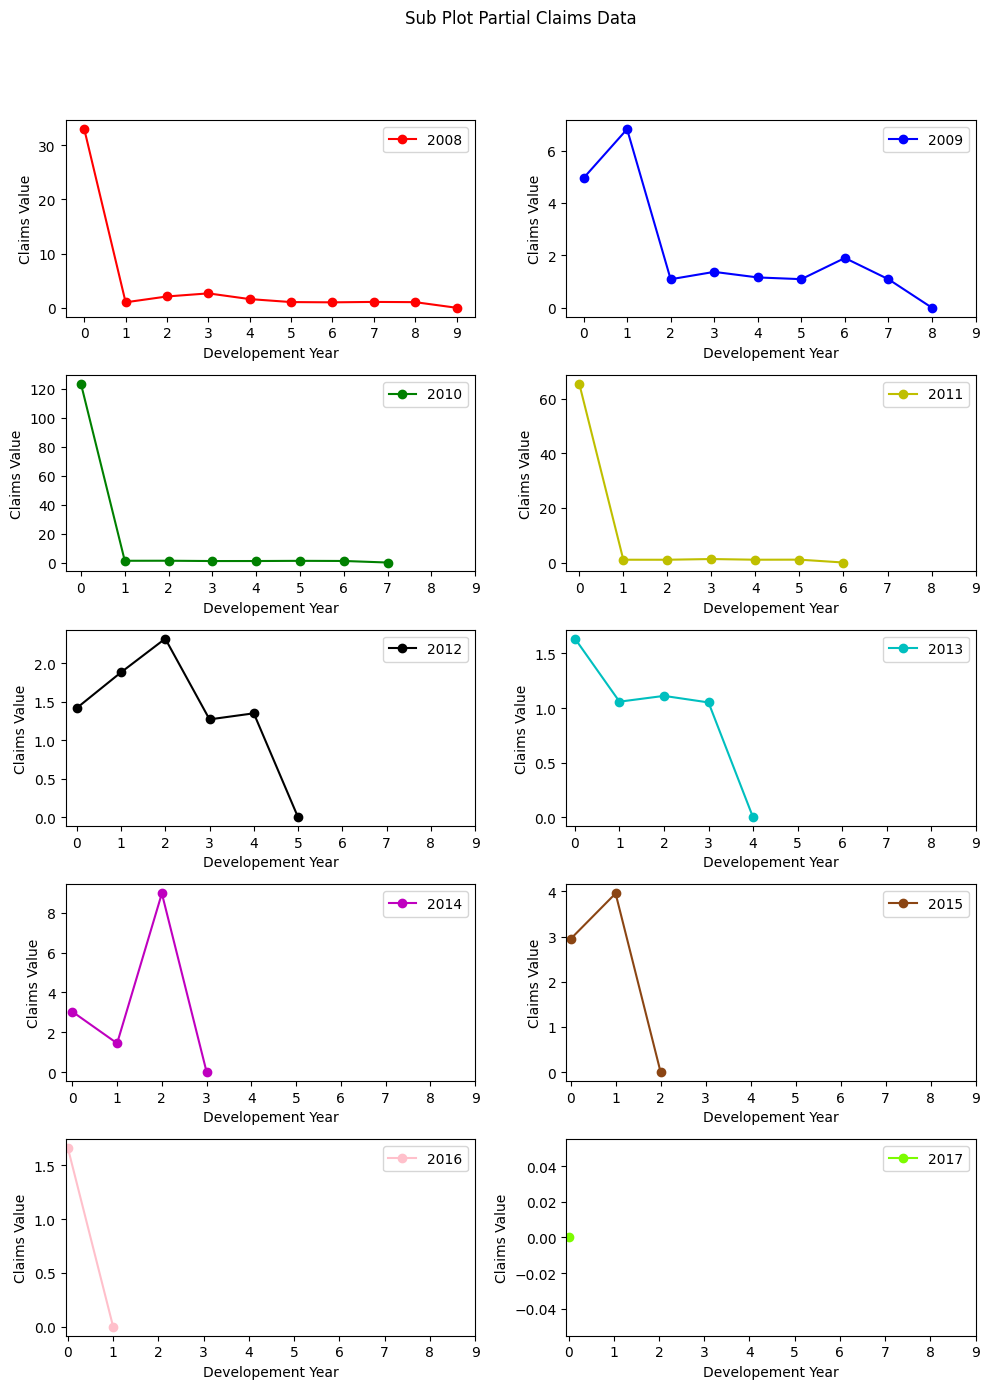

Inflated_LossDF                                          \
Year_Only_Lag               0         1         2         3         4   
Insured_Year                                                            
2008                32.951719  1.009895  2.084592  2.655661  1.601775   
2009                 4.947554  6.815869  1.088155  1.369581  1.157401   
2010               123.441261  1.208209  1.238815  1.024704  1.039035   
2011                65.398235  1.024123  1.018994  1.276877  1.026390   
2012                 1.419267  1.882983  2.320910  1.272073  1.350891   
2013                 1.634638  1.058032  1.111026  1.050925  0.000000   
2014                 3.030531  1.442594  8.971578  0.000000       NaN   
2015                 2.946348  3.955207  0.000000       NaN       NaN   
2016                 1.658826  0.000000       NaN       NaN       NaN   
2017                 0.000000       NaN       NaN       NaN       NaN   

                                                           
Year_Only_Lag         5         6         7        8    9  
Insured_Year                                               
2008           1.051427  1.002513  1.079278  1.03711  0.0  
2009           1.091577  1.899609  1.088604  0.00000  NaN  
2010           1.163880  1.076717  0.000000      NaN  NaN  
2011           1.052046  0.000000       NaN      NaN  NaN  
2012           0.000000       NaN       NaN      NaN  NaN  
2013                NaN       NaN       NaN      NaN  NaN  
2014                NaN       NaN       NaN      NaN  NaN  
2015                NaN       NaN       NaN      NaN  NaN  
2016                NaN       NaN       NaN      NaN  NaN  
2017                NaN       NaN       NaN      NaN  NaN

In [282]:
# Individual Loss Development factors
# Inflated
py_InflatedLossDF_triangle = pd.pivot_table(py_data, index=["Insured_Year"], columns=["Year_Only_Lag"], values=["Inflated_LossDF"])
SinglePlotPartialClaims(DataFrameName=py_data, InsuredYearColumn='Insured_Year', LagYearColumn='Year_Only_Lag', ValueColumn='Inflated_LossDF')
SubPlotPartialClaims(DataFrameName=py_data, InsuredYearColumn='Insured_Year', LagYearColumn='Year_Only_Lag', ValueColumn='Inflated_LossDF')
display(py_InflatedLossDF_triangle)

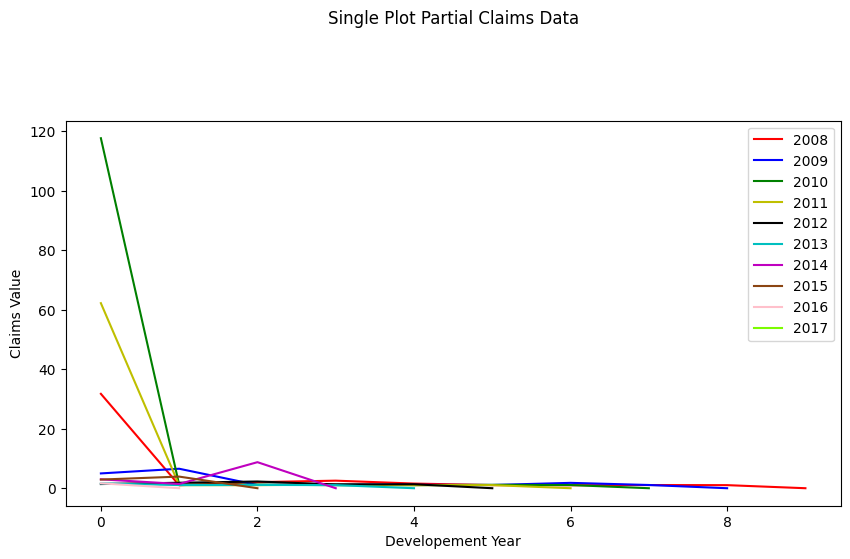

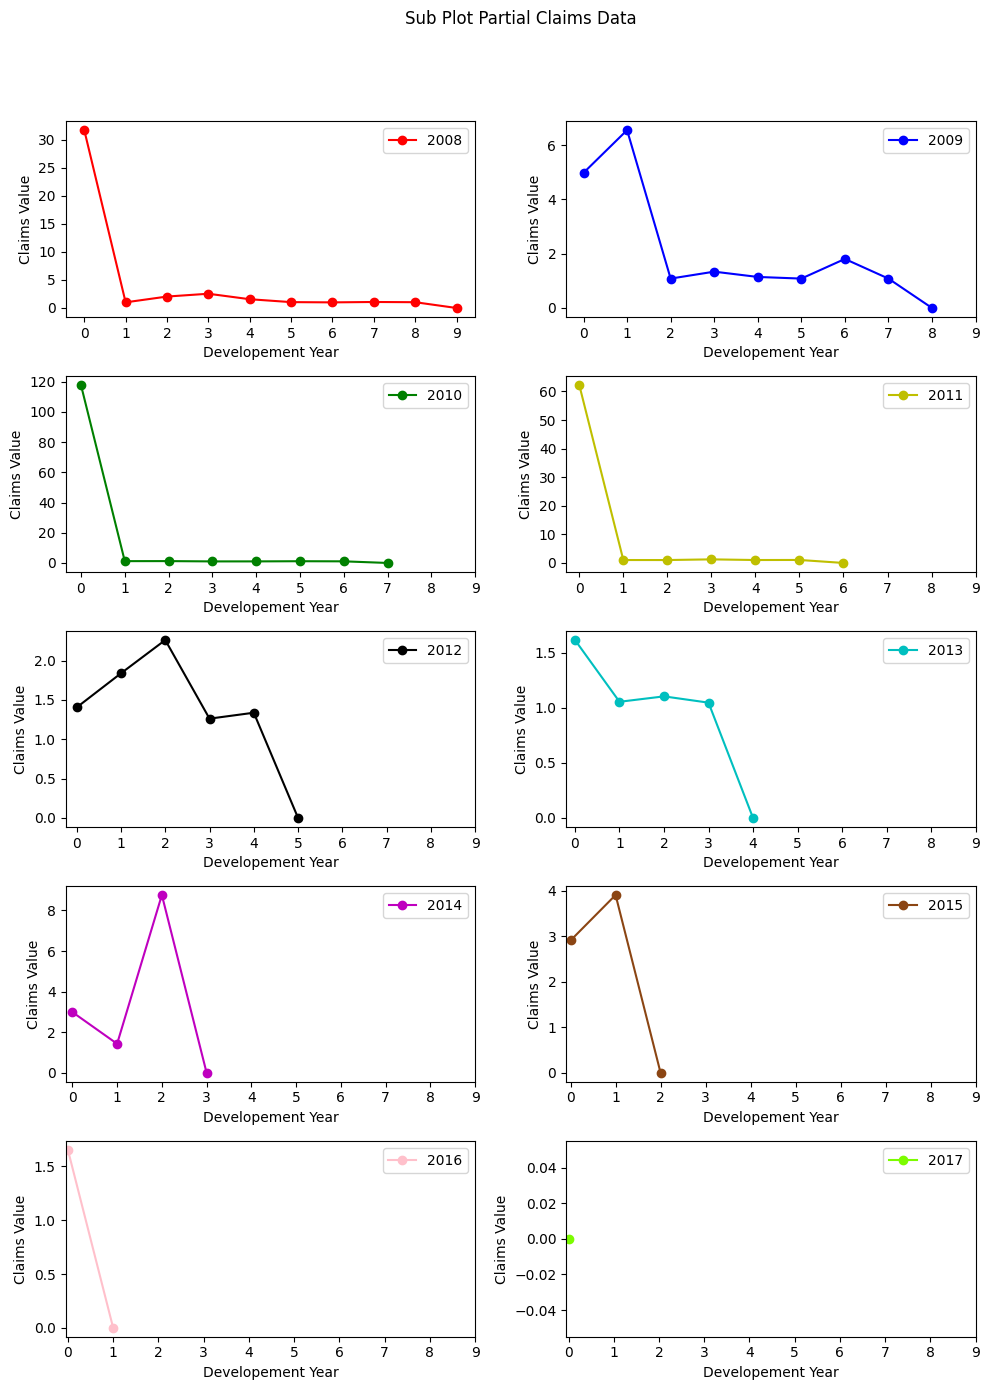

LossDF                                                    \
Year_Only_Lag           0         1         2         3         4         5   
Insured_Year                                                                  
2008            31.741427  1.009961  2.040580  2.542930  1.565467  1.048121   
2009             4.978637  6.552017  1.083239  1.338467  1.143550  1.082979   
2010           117.701827  1.197891  1.221040  1.022577  1.035092  1.145123   
2011            62.231109  1.023273  1.017848  1.255693  1.024318  1.047600   
2012             1.404809  1.838238  2.260928  1.261625  1.336971  0.000000   
2013             1.617638  1.056024  1.105381  1.048119  0.000000       NaN   
2014             2.993274  1.431659  8.759398  0.000000       NaN       NaN   
2015             2.909968  3.908261  0.000000       NaN       NaN       NaN   
2016             1.652551  0.000000       NaN       NaN       NaN       NaN   
2017             0.000000       NaN       NaN       NaN       NaN       NaN   

                                                  
Year_Only_Lag         6         7         8    9  
Insured_Year                                      
2008           1.002316  1.071698  1.033478  0.0  
2009           1.806260  1.082719  0.000000  NaN  
2010           1.068392  0.000000       NaN  NaN  
2011           0.000000       NaN       NaN  NaN  
2012                NaN       NaN       NaN  NaN  
2013                NaN       NaN       NaN  NaN  
2014                NaN       NaN       NaN  NaN  
2015                NaN       NaN       NaN  NaN  
2016                NaN       NaN       NaN  NaN  
2017                NaN       NaN       NaN  NaN

In [283]:
# Individual Loss Development factors
# Non-Inflated
py_LossDF_triangle = pd.pivot_table(py_data, index=["Insured_Year"], columns=["Year_Only_Lag"], values=["LossDF"])
SinglePlotPartialClaims(DataFrameName=py_data, InsuredYearColumn='Insured_Year', LagYearColumn='Year_Only_Lag', ValueColumn='LossDF')
SubPlotPartialClaims(DataFrameName=py_data, InsuredYearColumn='Insured_Year', LagYearColumn='Year_Only_Lag', ValueColumn='LossDF')
display(py_LossDF_triangle)

In [284]:
# Create a Temp Df of Predicted Years & LagYears rates
columns_3 = ['InsuredYear', 'PredictedYear_Only_Lag',
             'Previous_cumsum', 'Predicted_cumsum', 'Predicted_Incremental',
             'Previous_Inflated_cumsum', 'Predicted_Inflated_cumsum', 'Predicted_Inflated_Incremental']
Temp_df = pd.DataFrame(columns=columns_3)
# +1 due to 31 Dec 2017 (also not a Bday) & +1 due to range exlusion of last value cap
InsuredYr = list(range(YearStartCap + 1, YearEndCap + 1, 1))  # [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
Temp_df['InsuredYear'] = InsuredYr
Lags = list(range(0, YearEndCap - YearStartCap, 1))  # [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Temp_df['PredictedYear_Only_Lag'] = Lags

# Establish Predicted data-frame
Predicted_df = pd.DataFrame(columns=columns_3)

In [285]:
# Coordinates of predicted Insured Years & Lag Years
x = 1 # Do nothing
i = 0 # For loop impute indexing
for row in range(0, len(Temp_df['InsuredYear'])):
    BaseYr = Temp_df.loc[row, 'InsuredYear']
    for lag in range(0, len(Temp_df['PredictedYear_Only_Lag'])):
        LagYr = Temp_df.loc[lag, 'PredictedYear_Only_Lag']
        P_yr = BaseYr + Temp_df.loc[lag, 'PredictedYear_Only_Lag']
        if P_yr > YearEndCap:

            Predicted_df.loc[i, 'InsuredYear'] = BaseYr
            Predicted_df.loc[i, 'PredictedYear_Only_Lag'] = LagYr
            i += 1
        else:
            x = x

print(Predicted_df[['InsuredYear', 'PredictedYear_Only_Lag']])

   InsuredYear PredictedYear_Only_Lag
0         2009                      9
1         2010                      8
2         2010                      9
3         2011                      7
4         2011                      8
5         2011                      9
6         2012                      6
7         2012                      7
8         2012                      8
9         2012                      9
10        2013                      5
11        2013                      6
12        2013                      7
13        2013                      8
14        2013                      9
15        2014                      4
16        2014                      5
17        2014                      6
18        2014                      7
19        2014                      8
20        2014                      9
21        2015                      3
22        2015                      4
23        2015                      5
24        2015                      6
25        20

In [286]:
# Impute latest cumulative amounts available
# Inflated
for row in range(0, len(Predicted_df)):
    Base = Predicted_df.loc[row, 'InsuredYear']
    Lag = Predicted_df.loc[row, 'PredictedYear_Only_Lag']
    PredYr = Base + Lag

    if Base == YearEndCap:
        PrevInflatedCumSum = py_data.loc[(py_data['Insured_Year'] == Base), 'Inflated_cumsum'].values[0]

    else:
        if PredYr > YearEndCap or len(py_data.loc[(py_data['Insured_Year'] == Base) & (py_data['Year_Only_Lag'] == Lag - 1), 'Inflated_cumsum']) == 0:
            MaxLag = py_data.loc[(py_data['Insured_Year'] == Base), 'Year_Only_Lag'].max()
            PrevInflatedCumSum = py_data.loc[(py_data['Insured_Year'] == Base) & (py_data['Year_Only_Lag'] == MaxLag), 'Inflated_cumsum'].values[0]

        else:
            PrevInflatedCumSum = py_data.loc[(py_data['Insured_Year'] == Base) & (py_data['Year_Only_Lag'] == Lag - 1), 'Inflated_cumsum'].values[0]

    Predicted_df.loc[row, 'Previous_Inflated_cumsum'] = PrevInflatedCumSum

print(Predicted_df['Previous_Inflated_cumsum'])

0     29578136038.823853
1     29440358265.425198
2     29440358265.425198
3     59659134771.044075
4     59659134771.044075
5     59659134771.044075
6     15399172636.152044
7     15399172636.152044
8     15399172636.152044
9     15399172636.152044
10    28187793760.001511
11    28187793760.001511
12    28187793760.001511
13    28187793760.001511
14    28187793760.001511
15    56796330097.452965
16    56796330097.452965
17    56796330097.452965
18    56796330097.452965
19    56796330097.452965
20    56796330097.452965
21    54977483823.999367
22    54977483823.999367
23    54977483823.999367
24    54977483823.999367
25    54977483823.999367
26    54977483823.999367
27    54977483823.999367
28    36321332747.133377
29    36321332747.133377
30    36321332747.133377
31    36321332747.133377
32    36321332747.133377
33    36321332747.133377
34    36321332747.133377
35    36321332747.133377
36    38559247138.949867
37    38559247138.949867
38    38559247138.949867
39    38559247138.949867


In [287]:
# Impute latest cumulative amounts available
# Non-Inflated
for row in range(0, len(Predicted_df)):
    Base = Predicted_df.loc[row, 'InsuredYear']
    Lag = Predicted_df.loc[row, 'PredictedYear_Only_Lag']
    PredYr = Base + Lag

    if Base == YearEndCap:
        PrevCumSum = py_data.loc[(py_data['Insured_Year'] == Base), 'cumsum'].values[0]

    else:
        if PredYr > YearEndCap or len(
                py_data.loc[(py_data['Insured_Year'] == Base) & (py_data['Year_Only_Lag'] == Lag - 1), 'cumsum']) == 0:
            MaxLag = py_data.loc[(py_data['Insured_Year'] == Base), 'Year_Only_Lag'].max()
            PrevCumSum = py_data.loc[(py_data['Insured_Year'] == Base) & (py_data['Year_Only_Lag'] == MaxLag), 'cumsum'].values[0]

        else:
            PrevCumSum = py_data.loc[(py_data['Insured_Year'] == Base) & (py_data['Year_Only_Lag'] == Lag - 1), 'cumsum'].values[0]

    Predicted_df.loc[row, 'Previous_cumsum'] = PrevCumSum
    
print(Predicted_df['Previous_cumsum'])

0      31511356924.15374
1     32768797795.304001
2     32768797795.304001
3     64955184743.904495
4     64955184743.904495
5     64955184743.904495
6     15870079402.744604
7     15870079402.744604
8     15870079402.744604
9     15870079402.744604
10    29751408431.902042
11    29751408431.902042
12    29751408431.902042
13    29751408431.902042
14    29751408431.902042
15    56969442126.693344
16    56969442126.693344
17    56969442126.693344
18    56969442126.693344
19    56969442126.693344
20    56969442126.693344
21    55201863191.955475
22    55201863191.955475
23    55201863191.955475
24    55201863191.955475
25    55201863191.955475
26    55201863191.955475
27    55201863191.955475
28    36531869374.385681
29    36531869374.385681
30    36531869374.385681
31    36531869374.385681
32    36531869374.385681
33    36531869374.385681
34    36531869374.385681
35    36531869374.385681
36    38559247138.949867
37    38559247138.949867
38    38559247138.949867
39    38559247138.949867


In [288]:
# Establish averaged-year-to-year LDF
columns_4 = ['Year_Only_Lag',
             'SimpleMeanLossDF', 'VolWtdLossDF',
             'CumToUlt_SimpleMeanLossDF', 'CumToUlt_VolWtdLossDF',
             'SimpleMeanLossDF_5year', 'VolWtdLossDF_5year',
             'SimpleMeanLossDF_3year', 'VolWtdLossDF_3year',
             'SelectLossDF'
             'Inflated_SimpleMeanLossDF', 'Inflated_VolWtdLossDF',
             'Inflated_CumToUlt_SimpleMeanLossDF', 'Inflated_CumToUlt_VolWtdLossDF',
             'Inflated_SimpleMeanLossDF_5year', 'Inflated_VolWtdLossDF_5year',
             'Inflated_SimpleMeanLossDF_3year', 'Inflated_VolWtdLossDF_3year',
             'Inflated_SelectLossDF']
LossDF_df = pd.DataFrame(columns=columns_4)
Lags = list(range(0, YearEndCap-YearStartCap, 1))
LossDF_df['Year_Only_Lag'] = Lags
display(LossDF_df)

,Year_Only_Lag,SimpleMeanLossDF,VolWtdLossDF,CumToUlt_SimpleMeanLossDF,CumToUlt_VolWtdLossDF,SimpleMeanLossDF_5year,VolWtdLossDF_5year,SimpleMeanLossDF_3year,VolWtdLossDF_3year,SelectLossDFInflated_SimpleMeanLossDF,Inflated_VolWtdLossDF,Inflated_CumToUlt_SimpleMeanLossDF,Inflated_CumToUlt_VolWtdLossDF,Inflated_SimpleMeanLossDF_5year,Inflated_VolWtdLossDF_5year,Inflated_SimpleMeanLossDF_3year,Inflated_VolWtdLossDF_3year,Inflated_SelectLossDF
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


c:\Temp\ipykernel_6100\2998854761.py:7: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  SimpleMeanLossDF = py_data.loc[py_data['Year_Only_Lag'] == lagyr, 'Inflated_LossDF'][:-1].mean()
c:\Temp\ipykernel_6100\2998854761.py:11: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  Neum = py_data.loc[py_data['Year_Only_Lag'] == lagyr, 'Inflated_cumsum'][:-1].sum()
c:\Temp\ipykernel_6100\2998854761.py:7: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In

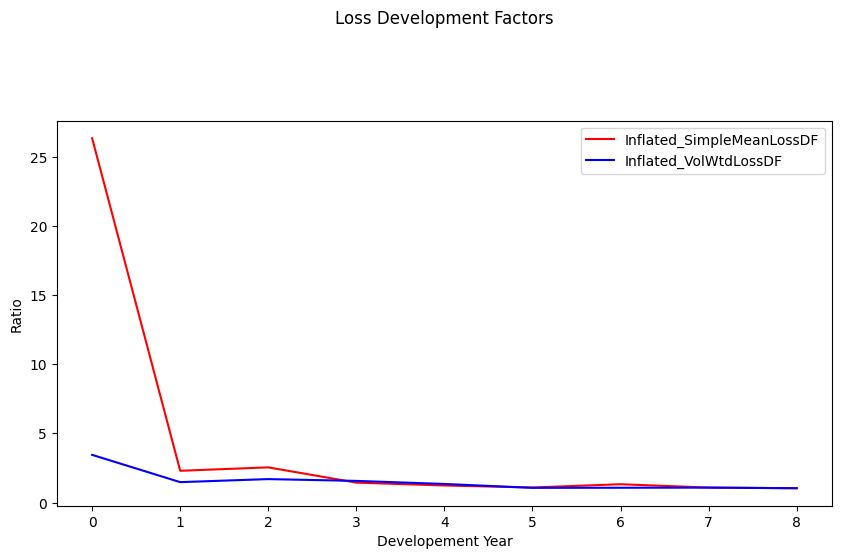

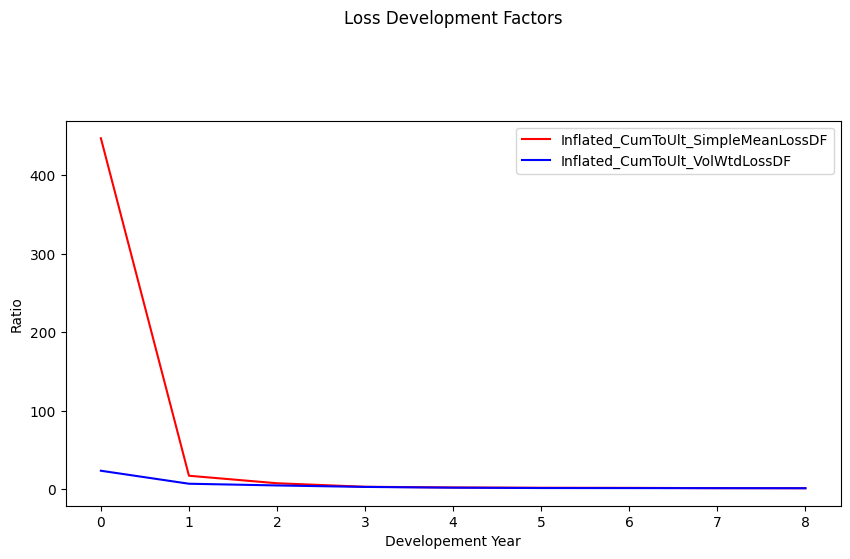

,Inflated_SimpleMeanLossDF,Inflated_VolWtdLossDF,Inflated_CumToUlt_SimpleMeanLossDF,Inflated_CumToUlt_VolWtdLossDF
0,26.380931,3.453242,447.136860,23.323499
1,2.299614,1.477645,16.949245,6.754087
2,2.547724,1.697265,7.370474,4.570845
3,1.441637,1.567422,2.892964,2.693064
4,1.235098,1.345819,2.006722,1.718149
5,1.089733,1.06374,1.624746,1.276657
6,1.326280,1.070974,1.490959,1.200159
7,1.083941,1.080526,1.124166,1.120624
8,1.037110,1.03711,1.037110,1.03711
9,NaN,NaN,NaN,NaN


In [289]:
# Inflated
i=0
for lag in range(0, len(Temp_df['PredictedYear_Only_Lag'])):
    lagyr = Temp_df.loc[lag, 'PredictedYear_Only_Lag']
    # Simple Mean
    # due to 0 input so exlude last value
    SimpleMeanLossDF = py_data.loc[py_data['Year_Only_Lag'] == lagyr, 'Inflated_LossDF'][:-1].mean()
    LossDF_df.loc[i, 'Inflated_SimpleMeanLossDF'] = SimpleMeanLossDF
    # Volume Weighted
    Deno = py_data.loc[py_data['Year_Only_Lag'] == (lagyr + 1), 'Inflated_cumsum'].sum()
    Neum = py_data.loc[py_data['Year_Only_Lag'] == lagyr, 'Inflated_cumsum'][:-1].sum()
    VolWtdLossDF = Deno / Neum
    LossDF_df.loc[i, 'Inflated_VolWtdLossDF'] = VolWtdLossDF
    i += 1

# [::-1] to flip or invert the row order
LossDF_df['Inflated_CumToUlt_SimpleMeanLossDF']=LossDF_df['Inflated_SimpleMeanLossDF'][::-1].cumprod()
LossDF_df['Inflated_CumToUlt_VolWtdLossDF']=LossDF_df['Inflated_VolWtdLossDF'][::-1].cumprod()

SinglePlotLDF(DataFrameName=LossDF_df, Columns=['Inflated_SimpleMeanLossDF', 'Inflated_VolWtdLossDF'])
SinglePlotLDF(DataFrameName=LossDF_df, Columns=['Inflated_CumToUlt_SimpleMeanLossDF', 'Inflated_CumToUlt_VolWtdLossDF'])
display(LossDF_df[['Inflated_SimpleMeanLossDF', 'Inflated_VolWtdLossDF', 'Inflated_CumToUlt_SimpleMeanLossDF', 'Inflated_CumToUlt_VolWtdLossDF']])

c:\Temp\ipykernel_6100\703405420.py:7: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  SimpleMeanLossDF = py_data.loc[py_data['Year_Only_Lag'] == lagyr, 'LossDF'][:-1].mean()
c:\Temp\ipykernel_6100\703405420.py:11: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  Neum = py_data.loc[py_data['Year_Only_Lag'] == lagyr, 'cumsum'][:-1].sum()
c:\Temp\ipykernel_6100\703405420.py:12: RuntimeWarning: invalid value encountered in double_scalars
  VolWtdLossDF = Deno / Neum


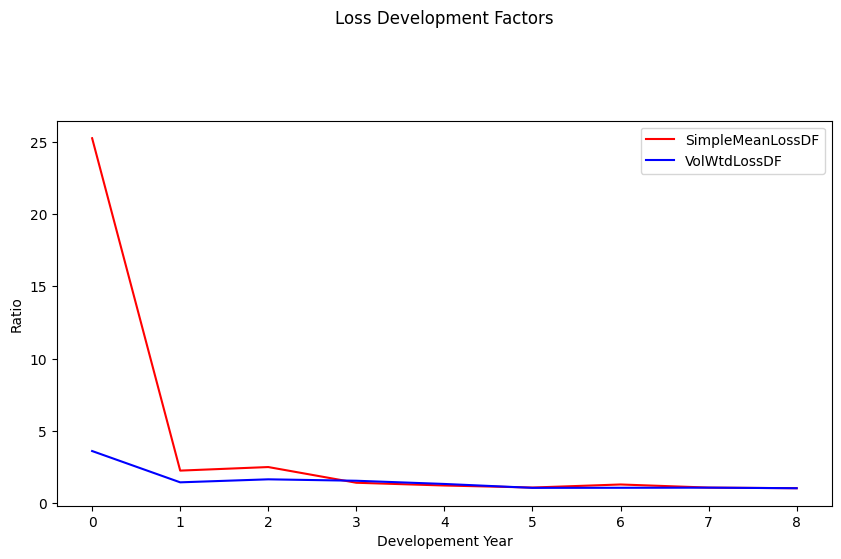

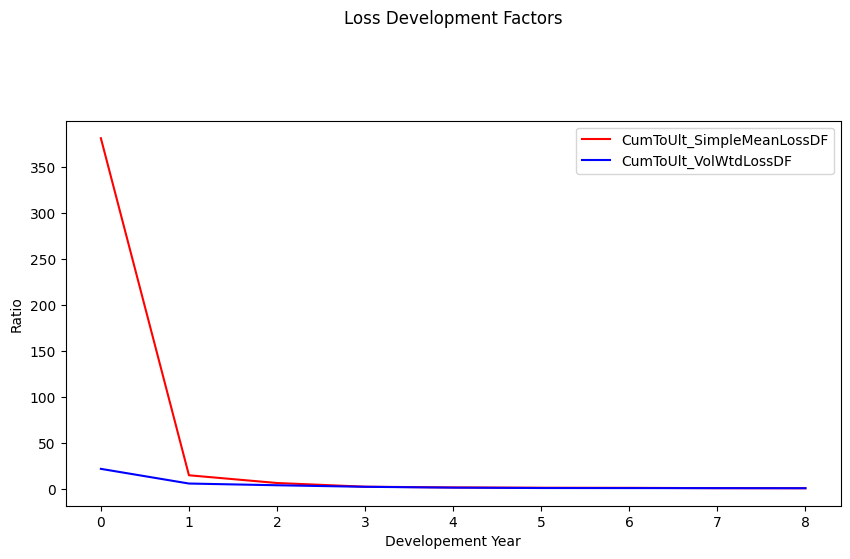

,SimpleMeanLossDF,VolWtdLossDF,CumToUlt_SimpleMeanLossDF,CumToUlt_VolWtdLossDF
0,25.247916,3.606227,380.806,22.048285
1,2.252165,1.440895,15.082671,6.113947
2,2.498345,1.649015,6.696964,4.243161
3,1.411569,1.55037,2.68056,2.573149
4,1.22108,1.3284,1.898994,1.6597
5,1.080956,1.058737,1.555176,1.249398
6,1.292322,1.064052,1.438705,1.180083
7,1.077208,1.073121,1.113271,1.109046
8,1.033478,1.033478,1.033478,1.033478
9,NaN,NaN,NaN,NaN


In [290]:
#  Non-Inflated
i=0
for lag in range(0, len(Temp_df['PredictedYear_Only_Lag'])):
    lagyr = Temp_df.loc[lag, 'PredictedYear_Only_Lag']
    # Simple Mean
    # due to 0 input so exlude last value
    SimpleMeanLossDF = py_data.loc[py_data['Year_Only_Lag'] == lagyr, 'LossDF'][:-1].mean()
    LossDF_df.loc[i, 'SimpleMeanLossDF'] = SimpleMeanLossDF
    # Volume Weighted
    Deno = py_data.loc[py_data['Year_Only_Lag'] == (lagyr + 1), 'cumsum'].sum()
    Neum = py_data.loc[py_data['Year_Only_Lag'] == lagyr, 'cumsum'][:-1].sum()
    VolWtdLossDF = Deno / Neum
    LossDF_df.loc[i, 'VolWtdLossDF'] = VolWtdLossDF
    i += 1

# [::-1] to flip or invert the row order
LossDF_df['CumToUlt_SimpleMeanLossDF']=LossDF_df['SimpleMeanLossDF'][::-1].cumprod()
LossDF_df['CumToUlt_VolWtdLossDF']=LossDF_df['VolWtdLossDF'][::-1].cumprod()

SinglePlotLDF(DataFrameName=LossDF_df, Columns=['SimpleMeanLossDF', 'VolWtdLossDF'])
SinglePlotLDF(DataFrameName=LossDF_df, Columns=['CumToUlt_SimpleMeanLossDF', 'CumToUlt_VolWtdLossDF'])
display(LossDF_df[['SimpleMeanLossDF', 'VolWtdLossDF', 'CumToUlt_SimpleMeanLossDF', 'CumToUlt_VolWtdLossDF']])

c:\Temp\ipykernel_6100\2161218538.py:7: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  SimpleMeanLossDF_Ayear = py_data.loc[py_data['Year_Only_Lag'] == lagyr, 'Inflated_LossDF'][:Year_A].mean()
c:\Temp\ipykernel_6100\2161218538.py:10: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  SimpleMeanLossDF_Byear = py_data.loc[py_data['Year_Only_Lag'] == lagyr, 'Inflated_LossDF'][:Year_B].mean()
c:\Temp\ipykernel_6100\2161218538.py:13: FutureWarning: The behavior of `series[i:j]` with an int

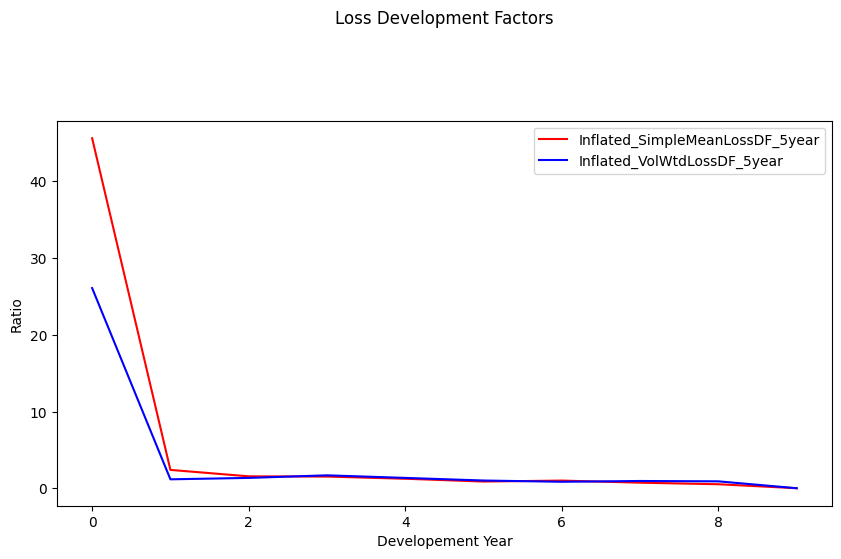

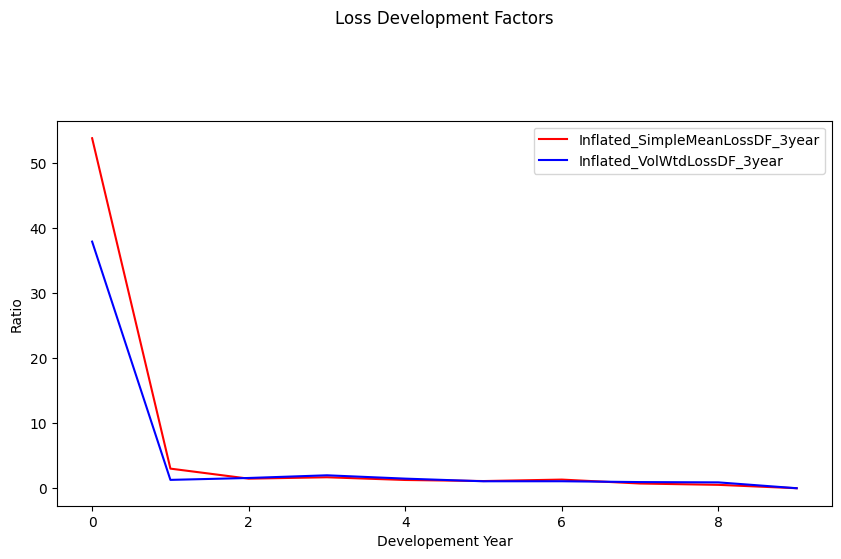

,Inflated_SimpleMeanLossDF_5year,Inflated_VolWtdLossDF_5year,Inflated_SimpleMeanLossDF_3year,Inflated_VolWtdLossDF_3year
0,45.631607,26.097064,53.780178,37.894274
1,2.388216,1.160853,3.011324,1.282304
2,1.550293,1.344976,1.47052,1.572775
3,1.519779,1.681177,1.683315,1.985404
4,1.235098,1.345819,1.26607,1.473203
5,0.871786,1.004291,1.102295,1.066999
6,0.99471,0.840082,1.32628,1.070974
7,0.722627,0.943687,0.722627,0.943687
8,0.518555,0.897281,0.518555,0.897281
9,0.0,0.0,0.0,0.0


In [291]:
# Inflated
i=0
for lag in range(0, len(Temp_df['PredictedYear_Only_Lag'])):
    lagyr = Temp_df.loc[lag, 'PredictedYear_Only_Lag']
    # Simple Mean
    Year_A = 5   # 5 Year
    SimpleMeanLossDF_Ayear = py_data.loc[py_data['Year_Only_Lag'] == lagyr, 'Inflated_LossDF'][:Year_A].mean()
    LossDF_df.loc[i, 'Inflated_SimpleMeanLossDF_5year'] = SimpleMeanLossDF_Ayear
    Year_B = 3   # 3 Year
    SimpleMeanLossDF_Byear = py_data.loc[py_data['Year_Only_Lag'] == lagyr, 'Inflated_LossDF'][:Year_B].mean()
    LossDF_df.loc[i, 'Inflated_SimpleMeanLossDF_3year'] = SimpleMeanLossDF_Byear
    # Volume Weighted
    Deno_A = py_data.loc[py_data['Year_Only_Lag'] == (lagyr + 1), 'Inflated_cumsum'][:Year_A].sum()
    Neum_A = py_data.loc[py_data['Year_Only_Lag'] == lagyr, 'Inflated_cumsum'][:Year_A].sum()
    VolWtdLossDF_A = Deno_A / Neum_A
    LossDF_df.loc[i, 'Inflated_VolWtdLossDF_5year'] = VolWtdLossDF_A
    Deno_B = py_data.loc[py_data['Year_Only_Lag'] == (lagyr + 1), 'Inflated_cumsum'][:Year_B].sum()
    Neum_B = py_data.loc[py_data['Year_Only_Lag'] == lagyr, 'Inflated_cumsum'][:Year_B].sum()
    VolWtdLossDF_B = Deno_B / Neum_B
    LossDF_df.loc[i, 'Inflated_VolWtdLossDF_3year'] = VolWtdLossDF_B
    i += 1

SinglePlotLDF(DataFrameName=LossDF_df, Columns=['Inflated_SimpleMeanLossDF_5year', 'Inflated_VolWtdLossDF_5year'])
SinglePlotLDF(DataFrameName=LossDF_df, Columns=['Inflated_SimpleMeanLossDF_3year', 'Inflated_VolWtdLossDF_3year'])    
display(LossDF_df[['Inflated_SimpleMeanLossDF_5year', 'Inflated_VolWtdLossDF_5year', 'Inflated_SimpleMeanLossDF_3year', 'Inflated_VolWtdLossDF_3year']])

c:\Temp\ipykernel_6100\2559057903.py:7: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  SimpleMeanLossDF_Ayear = py_data.loc[py_data['Year_Only_Lag'] == lagyr, 'Inflated_LossDF'][:Year_A].mean()
c:\Temp\ipykernel_6100\2559057903.py:10: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  SimpleMeanLossDF_Byear = py_data.loc[py_data['Year_Only_Lag'] == lagyr, 'Inflated_LossDF'][:Year_B].mean()
c:\Temp\ipykernel_6100\2559057903.py:13: FutureWarning: The behavior of `series[i:j]` with an int

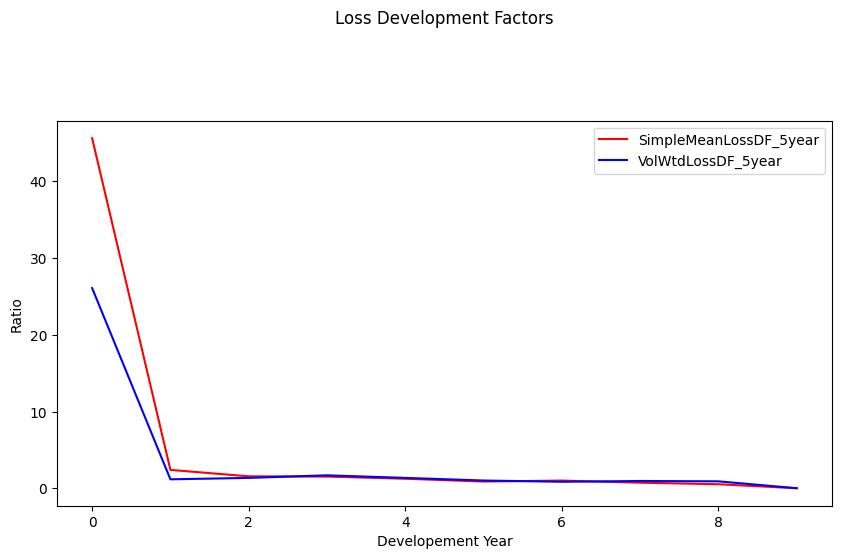

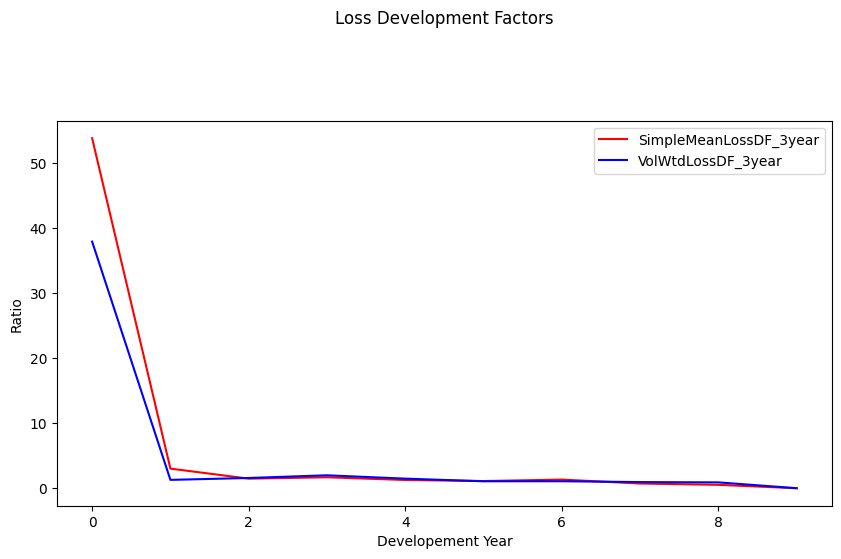

,SimpleMeanLossDF_5year,VolWtdLossDF_5year,SimpleMeanLossDF_3year,VolWtdLossDF_3year
0,45.631607,26.097064,53.780178,37.894274
1,2.388216,1.160853,3.011324,1.282304
2,1.550293,1.344976,1.47052,1.572775
3,1.519779,1.681177,1.683315,1.985404
4,1.235098,1.345819,1.26607,1.473203
5,0.871786,1.004291,1.102295,1.066999
6,0.99471,0.840082,1.32628,1.070974
7,0.722627,0.943687,0.722627,0.943687
8,0.518555,0.897281,0.518555,0.897281
9,0.0,0.0,0.0,0.0


In [292]:
# Non Inflated
i=0
for lag in range(0, len(Temp_df['PredictedYear_Only_Lag'])):
    lagyr = Temp_df.loc[lag, 'PredictedYear_Only_Lag']
    # Simple Mean
    Year_A = 5   # 5 Year
    SimpleMeanLossDF_Ayear = py_data.loc[py_data['Year_Only_Lag'] == lagyr, 'Inflated_LossDF'][:Year_A].mean()
    LossDF_df.loc[i, 'SimpleMeanLossDF_5year'] = SimpleMeanLossDF_Ayear
    Year_B = 3   # 3 Year
    SimpleMeanLossDF_Byear = py_data.loc[py_data['Year_Only_Lag'] == lagyr, 'Inflated_LossDF'][:Year_B].mean()
    LossDF_df.loc[i, 'SimpleMeanLossDF_3year'] = SimpleMeanLossDF_Byear
    # Volume Weighted
    Deno_A = py_data.loc[py_data['Year_Only_Lag'] == (lagyr + 1), 'Inflated_cumsum'][:Year_A].sum()
    Neum_A = py_data.loc[py_data['Year_Only_Lag'] == lagyr, 'Inflated_cumsum'][:Year_A].sum()
    VolWtdLossDF_A = Deno_A / Neum_A
    LossDF_df.loc[i, 'VolWtdLossDF_5year'] = VolWtdLossDF_A
    Deno_B = py_data.loc[py_data['Year_Only_Lag'] == (lagyr + 1), 'Inflated_cumsum'][:Year_B].sum()
    Neum_B = py_data.loc[py_data['Year_Only_Lag'] == lagyr, 'Inflated_cumsum'][:Year_B].sum()
    VolWtdLossDF_B = Deno_B / Neum_B
    LossDF_df.loc[i, 'VolWtdLossDF_3year'] = VolWtdLossDF_B
    i += 1

SinglePlotLDF(DataFrameName=LossDF_df, Columns=['SimpleMeanLossDF_5year', 'VolWtdLossDF_5year'])
SinglePlotLDF(DataFrameName=LossDF_df, Columns=['SimpleMeanLossDF_3year', 'VolWtdLossDF_3year'])
display(LossDF_df[['SimpleMeanLossDF_5year', 'VolWtdLossDF_5year', 'SimpleMeanLossDF_3year', 'VolWtdLossDF_3year']])

In [293]:
LossDF_df['Inflated_SelectLossDF'] = LossDF_df['Inflated_VolWtdLossDF']
LossDF_df['SelectLossDF'] = LossDF_df['VolWtdLossDF']

In [294]:
# Predict Cumulative Claim Amounts
# Inflated
# Set Equal for easy reference
Predicted_df['Predicted_Inflated_cumsum'] = Predicted_df['Previous_Inflated_cumsum']
lagyearlimit = (YearEndCap - YearStartCap) - 1
x = 1  # Do nothing
for row in range(0, len(Predicted_df)):
    PredLagYr = Predicted_df.loc[row, 'PredictedYear_Only_Lag']
    BaseInsuredYr = Predicted_df.loc[row, 'InsuredYear']
    MaxLagYr = py_data.loc[(py_data['Insured_Year'] == BaseInsuredYr), 'Year_Only_Lag'].max()
    for r in range(0, len(LossDF_df)):
        if (LossDF_df.loc[r, 'Year_Only_Lag'] == lagyearlimit):
            x = x  # To avoid NaN
        elif (LossDF_df.loc[r, 'Year_Only_Lag'] == MaxLagYr):
            # LDF multiplication
            LDF = LossDF_df.loc[(LossDF_df['Year_Only_Lag'] >= MaxLagYr) & (LossDF_df['Year_Only_Lag'] <= (PredLagYr - 1)), 'Inflated_SelectLossDF'].prod()
            Predicted_df.loc[row, 'Predicted_Inflated_cumsum'] = Predicted_df.loc[row, 'Predicted_Inflated_cumsum'] * LDF
        else:
            x = x  # Do nothing
            
print(Predicted_df['Predicted_Inflated_cumsum'])

0      30675792543.240086
1      31811064203.216465
2      32991585568.363701
3      63893365465.010971
4      69038424486.634979
5      71600468139.180756
6      16380710737.705275
7      17543310706.021427
8      18955998367.099434
9      19659463077.588253
10     37935663461.543678
11     40353669933.384247
12     43217719982.079826
13     46697857840.987679
14     48430834095.278481
15       89023804403.9496
16    119809911789.788177
17    127446555403.311172
18    136491911471.582031
19    147483020413.560333
20     152956174517.50412
21     93311383258.323334
22    146258293759.432159
23    196837164971.406921
24    209383499880.827942
25    224244225659.169617
26    242301652559.097321
27    251293564172.905396
28      53670043085.24192
29     91092309277.922562
30    142780068887.329865
31    192156104462.908447
32    204404070144.752838
33    218911387273.977234
34    236539383542.963745
35    245317455039.955353
36     133154414254.47644
37    196754981425.947906
38    333945

In [295]:
# Predict Cumulative Claim Amounts
# Non-Inflated
# Set Equal for easy reference
Predicted_df['Predicted_cumsum'] = Predicted_df['Previous_cumsum']
lagyearlimit = (YearEndCap - YearStartCap) - 1
x = 1  # Do nothing
for row in range(0, len(Predicted_df)):
    PredLagYr = Predicted_df.loc[row, 'PredictedYear_Only_Lag']
    BaseInsuredYr = Predicted_df.loc[row, 'InsuredYear']
    MaxLagYr = py_data.loc[(py_data['Insured_Year'] == BaseInsuredYr), 'Year_Only_Lag'].max()
    for r in range(0, len(LossDF_df)):
        if (LossDF_df.loc[r, 'Year_Only_Lag'] == lagyearlimit):
            x = x  # To avoid NaN
        elif (LossDF_df.loc[r, 'Year_Only_Lag'] == MaxLagYr):
            # LDF multiplication
            LDF = LossDF_df.loc[(LossDF_df['Year_Only_Lag'] >= MaxLagYr) & (LossDF_df['Year_Only_Lag'] <= (PredLagYr - 1)), 'SelectLossDF'].prod()
            Predicted_df.loc[row, 'Predicted_cumsum'] = Predicted_df.loc[row, 'Predicted_cumsum'] * LDF
        else:
            x = x  # Do nothing

print(Predicted_df['Predicted_cumsum'])

0      32566285387.638462
1      35164873901.635864
2      36342113792.732147
3        69115702942.5513
4      74169488724.607376
5      76652514287.931274
6      16802241650.830446
7      17878461084.921139
8      19185745950.577778
9      19828041029.941292
10     39521771010.137192
11     41843164745.997902
12     44523308742.217346
13     47778882441.272964
14     49378410610.183861
15     88323715900.891953
16    117329224348.801682
17    124220801306.900116
18    132177408720.542252
19    141842308019.275085
20    146590865449.412445
21     91028683498.134277
22    141128143088.384613
23    187474625511.987152
24    198486339060.571075
25    211199812651.634644
26    226642882242.331329
27    234230369766.246399
28     52638575708.338234
29      86801784774.63382
30    134574885972.648026
31    178769278748.605835
32    189269665579.573151
33    201392791565.593933
34    216118765306.594116
35    223353929363.916748
36    139053416288.640167
37    200361325772.854584
38    330398

In [296]:
# Data-type adjustments
# Years
Predicted_df[['InsuredYear','PredictedYear_Only_Lag']]=Predicted_df[['InsuredYear','PredictedYear_Only_Lag']].astype(int)
# Amounts
Predicted_df[['Predicted_cumsum','Previous_cumsum']]=Predicted_df[['Predicted_cumsum','Previous_cumsum']].astype(float)
Predicted_df[['Predicted_Inflated_cumsum','Previous_Inflated_cumsum']]=Predicted_df[['Predicted_Inflated_cumsum','Previous_Inflated_cumsum']].astype(float)

In [297]:
# Predict Incremental Amount
# Inflated
for row in range(0, len(Predicted_df)):
    InsurYr = Predicted_df.loc[row, 'InsuredYear']
    LagYr = Predicted_df.loc[row, 'PredictedYear_Only_Lag']
    CurrCum = Predicted_df.loc[row, 'Predicted_Inflated_cumsum']
    # For which we can't look up in Predicted_df
    if len(Predicted_df.loc[(Predicted_df['InsuredYear'] == InsurYr) & (Predicted_df['PredictedYear_Only_Lag'] == LagYr - 1), 'Predicted_Inflated_cumsum']) == 0:
        PrevCum = py_data.loc[(py_data['Insured_Year'] == InsurYr) & (py_data['Year_Only_Lag'] == LagYr - 1), 'Inflated_cumsum'].values[0]
    # For which we can look up in Predicted_df
    else:
        PrevCum = Predicted_df.loc[(Predicted_df['InsuredYear'] == InsurYr) & (Predicted_df['PredictedYear_Only_Lag'] == LagYr - 1), 'Predicted_Inflated_cumsum'].values[0]

    Predicted_df.loc[row, 'Predicted_Inflated_Incremental'] = (CurrCum - PrevCum)

Predicted_df[['Predicted_Inflated_Incremental']] = Predicted_df[['Predicted_Inflated_Incremental']].astype(float)
PredictedInflatedIncrementalTriangle = pd.pivot_table(Predicted_df, index=["InsuredYear"],columns=["PredictedYear_Only_Lag"],values=["Predicted_Inflated_Incremental"])

# print(PredictedInflatedIncrementalTriangle)
display(PredictedInflatedIncrementalTriangle)

Predicted_Inflated_Incremental                \
PredictedYear_Only_Lag                              1             2   
InsuredYear                                                           
2009                                              NaN           NaN   
2010                                              NaN           NaN   
2011                                              NaN           NaN   
2012                                              NaN           NaN   
2013                                              NaN           NaN   
2014                                              NaN           NaN   
2015                                              NaN           NaN   
2016                                              NaN  1.734871e+10   
2017                                     9.459517e+10  6.360057e+10   

                                                                  \
PredictedYear_Only_Lag             3             4             5   
InsuredYear                                                        
2009                             NaN           NaN           NaN   
2010                             NaN           NaN           NaN   
2011                             NaN           NaN           NaN   
2012                             NaN           NaN           NaN   
2013                             NaN           NaN  9.747870e+09   
2014                             NaN  3.222747e+10  3.078611e+10   
2015                    3.833390e+10  5.294691e+10  5.057887e+10   
2016                    3.742227e+10  5.168776e+10  4.937604e+10   
2017                    1.371904e+11  1.894879e+11  1.810131e+11   

                                                                                
PredictedYear_Only_Lag             6             7             8             9  
InsuredYear                                                                     
2009                             NaN           NaN           NaN  1.097657e+09  
2010                             NaN           NaN  2.370706e+09  1.180521e+09  
2011                             NaN  4.234231e+09  5.145059e+09  2.562044e+09  
2012                    9.815381e+08  1.162600e+09  1.412688e+09  7.034647e+08  
2013                    2.418006e+09  2.864050e+09  3.480138e+09  1.732976e+09  
2014                    7.636644e+09  9.045356e+09  1.099111e+10  5.473154e+09  
2015                    1.254633e+10  1.486073e+10  1.805743e+10  8.991912e+09  
2016                    1.224797e+10  1.450732e+10  1.762800e+10  8.778071e+09  
2017                    4.490118e+10  5.318399e+10  6.462443e+10  3.218051e+10

In [298]:
# Predict Incremental Amount
# Non-Inflated
for row in range(0, len(Predicted_df)):
    InsurYr = Predicted_df.loc[row, 'InsuredYear']
    LagYr = Predicted_df.loc[row, 'PredictedYear_Only_Lag']
    CurrCum = Predicted_df.loc[row, 'Predicted_cumsum']

    if len(Predicted_df.loc[(Predicted_df['InsuredYear'] == InsurYr) & (Predicted_df['PredictedYear_Only_Lag'] == LagYr - 1), 'Predicted_cumsum']) == 0:
        PrevCum = py_data.loc[(py_data['Insured_Year'] == InsurYr) & (py_data['Year_Only_Lag'] == LagYr - 1), 'cumsum'].values[0]
    else:
        PrevCum = Predicted_df.loc[(Predicted_df['InsuredYear'] == InsurYr) & (Predicted_df['PredictedYear_Only_Lag'] == LagYr - 1), 'Predicted_cumsum'].values[0]

    Predicted_df.loc[row, 'Predicted_Incremental'] = CurrCum - PrevCum

Predicted_df[['Predicted_Incremental']] = Predicted_df[['Predicted_Incremental']].astype(float)
PredictedIncrementalTriangle = pd.pivot_table(Predicted_df, index=["InsuredYear"], columns=["PredictedYear_Only_Lag"],values=["Predicted_Incremental"])

# print(PredictedIncrementalTriangle)
display(PredictedIncrementalTriangle)

Predicted_Incremental                              \
PredictedYear_Only_Lag                     1             2             3   
InsuredYear                                                                
2009                                     NaN           NaN           NaN   
2010                                     NaN           NaN           NaN   
2011                                     NaN           NaN           NaN   
2012                                     NaN           NaN           NaN   
2013                                     NaN           NaN           NaN   
2014                                     NaN           NaN           NaN   
2015                                     NaN           NaN  3.582682e+10   
2016                                     NaN  1.610671e+10  3.416321e+10   
2017                            1.004942e+11  6.130791e+10  1.300374e+11   

                                                                  \
PredictedYear_Only_Lag             4             5             6   
InsuredYear                                                        
2009                             NaN           NaN           NaN   
2010                             NaN           NaN           NaN   
2011                             NaN           NaN           NaN   
2012                             NaN           NaN  9.321622e+08   
2013                             NaN  9.770363e+09  2.321394e+09   
2014                    3.135427e+10  2.900551e+10  6.891577e+09   
2015                    5.009946e+10  4.634648e+10  1.101171e+10   
2016                    4.777310e+10  4.419439e+10  1.050039e+10   
2017                    1.818416e+11  1.682197e+11  3.996824e+10   

                                                                  
PredictedYear_Only_Lag             7             8             9  
InsuredYear                                                       
2009                             NaN           NaN  1.054928e+09  
2010                             NaN  2.396076e+09  1.177240e+09  
2011                    4.160518e+09  5.053786e+09  2.483026e+09  
2012                    1.076219e+09  1.307285e+09  6.422951e+08  
2013                    2.680144e+09  3.255574e+09  1.599528e+09  
2014                    7.956607e+09  9.664899e+09  4.748557e+09  
2015                    1.271347e+10  1.544307e+10  7.587488e+09  
2016                    1.212313e+10  1.472597e+10  7.235164e+09  
2017                    4.614497e+10  5.605235e+10  2.753963e+10

In [299]:
# Project (Future Inflation) Predicted Incremental Amount
# Inflated
FutureInflation = Inflation_df.loc[(Inflation_df['Year'] == (YearEndCap + 1)), 'CumPastInflation'].values[0]

Predicted_df['FutureUplifted_Predicted_Inflated_Incremental'] = Predicted_df['Predicted_Inflated_Incremental']
for row in range(0, len(Predicted_df)):
    InsurYr = Predicted_df.loc[row, 'InsuredYear']
    LagYr = Predicted_df.loc[row, 'PredictedYear_Only_Lag']
    CurrIncremAmt = Predicted_df.loc[row, 'Predicted_Inflated_Incremental']
    Predicted_df.loc[row, 'FutureUplifted_Predicted_Inflated_Incremental'] = CurrIncremAmt * (FutureInflation ** LagYr)
    
print(Predicted_df['FutureUplifted_Predicted_Inflated_Incremental'])

0     1.097657e+09
1     2.370706e+09
2     1.180521e+09
3     4.234231e+09
4     5.145059e+09
5     2.562044e+09
6     9.815381e+08
7     1.162600e+09
8     1.412688e+09
9     7.034647e+08
10    9.747870e+09
11    2.418006e+09
12    2.864050e+09
13    3.480138e+09
14    1.732976e+09
15    3.222747e+10
16    3.078611e+10
17    7.636644e+09
18    9.045356e+09
19    1.099111e+10
20    5.473154e+09
21    3.833390e+10
22    5.294691e+10
23    5.057887e+10
24    1.254633e+10
25    1.486073e+10
26    1.805743e+10
27    8.991912e+09
28    1.734871e+10
29    3.742227e+10
30    5.168776e+10
31    4.937604e+10
32    1.224797e+10
33    1.450732e+10
34    1.762800e+10
35    8.778071e+09
36    9.459517e+10
37    6.360057e+10
38    1.371904e+11
39    1.894879e+11
40    1.810131e+11
41    4.490118e+10
42    5.318399e+10
43    6.462443e+10
44    3.218051e+10
Name: FutureUplifted_Predicted_Inflated_Incremental, dtype: float64


In [300]:
# Project (Future Inflation) Predicted Incremental Amount
# Non-Inflated
# Set equal for easy reference
Predicted_df['FutureUplifted_Predicted_Incremental'] = Predicted_df['Predicted_Incremental']
FutureInflation = Inflation_df.loc[(Inflation_df['Year'] == (YearEndCap + 1)), 'CumPastInflation'].values[0]

for row in range(0, len(Predicted_df)):
    InsurYr = Predicted_df.loc[row, 'InsuredYear']
    LagYr = Predicted_df.loc[row, 'PredictedYear_Only_Lag']
    CurrIncremAmt = Predicted_df.loc[row, 'Predicted_Incremental']

    Predicted_df.loc[row, 'FutureUplifted_Predicted_Incremental'] = CurrIncremAmt * (FutureInflation ** LagYr)
    
print(Predicted_df['FutureUplifted_Predicted_Incremental'])

0     1.054928e+09
1     2.396076e+09
2     1.177240e+09
3     4.160518e+09
4     5.053786e+09
5     2.483026e+09
6     9.321622e+08
7     1.076219e+09
8     1.307285e+09
9     6.422951e+08
10    9.770363e+09
11    2.321394e+09
12    2.680144e+09
13    3.255574e+09
14    1.599528e+09
15    3.135427e+10
16    2.900551e+10
17    6.891577e+09
18    7.956607e+09
19    9.664899e+09
20    4.748557e+09
21    3.582682e+10
22    5.009946e+10
23    4.634648e+10
24    1.101171e+10
25    1.271347e+10
26    1.544307e+10
27    7.587488e+09
28    1.610671e+10
29    3.416321e+10
30    4.777310e+10
31    4.419439e+10
32    1.050039e+10
33    1.212313e+10
34    1.472597e+10
35    7.235164e+09
36    1.004942e+11
37    6.130791e+10
38    1.300374e+11
39    1.818416e+11
40    1.682197e+11
41    3.996824e+10
42    4.614497e+10
43    5.605235e+10
44    2.753963e+10
Name: FutureUplifted_Predicted_Incremental, dtype: float64


In [301]:
# Incremental
# Non-Inflated
PredictedTriangle = pd.pivot_table(Predicted_df, index=["InsuredYear"], columns=["PredictedYear_Only_Lag"], values=["FutureUplifted_Predicted_Incremental"])
# Inflated
PredictedInflatedTriangle = pd.pivot_table(Predicted_df, index=["InsuredYear"], columns=["PredictedYear_Only_Lag"], values=["FutureUplifted_Predicted_Inflated_Incremental"])

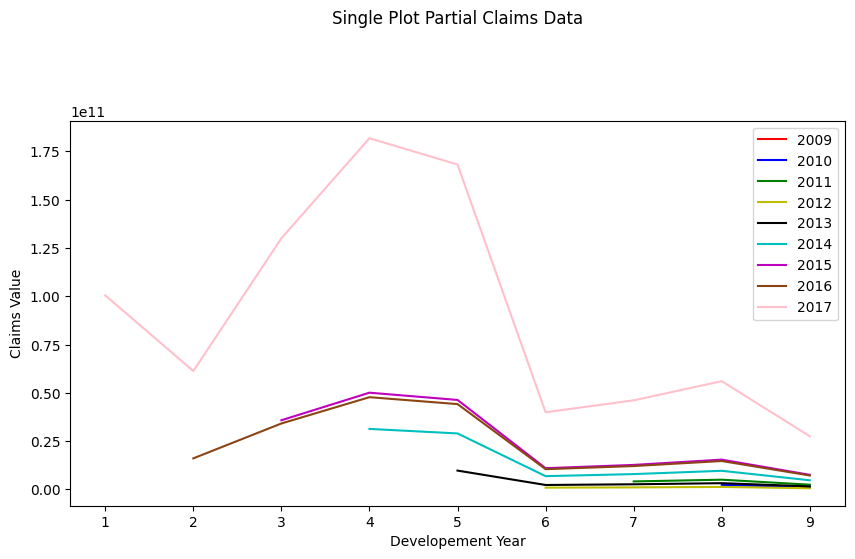

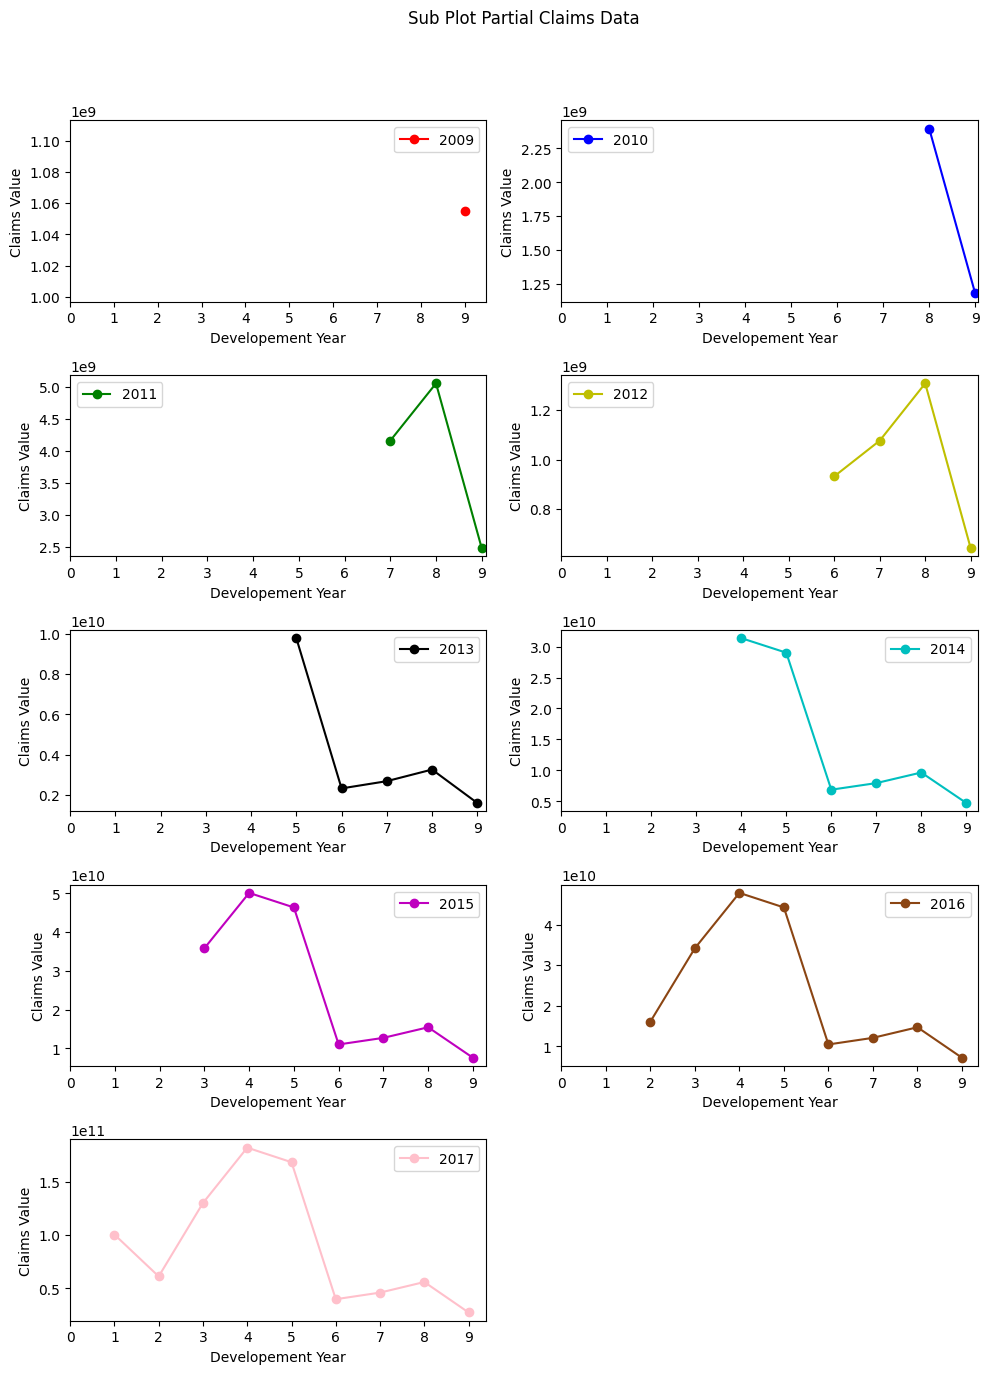

FutureUplifted_Predicted_Incremental                \
PredictedYear_Only_Lag                                    1             2   
InsuredYear                                                                 
2009                                                    NaN           NaN   
2010                                                    NaN           NaN   
2011                                                    NaN           NaN   
2012                                                    NaN           NaN   
2013                                                    NaN           NaN   
2014                                                    NaN           NaN   
2015                                                    NaN           NaN   
2016                                                    NaN  1.610671e+10   
2017                                           1.004942e+11  6.130791e+10   

                                                                  \
PredictedYear_Only_Lag             3             4             5   
InsuredYear                                                        
2009                             NaN           NaN           NaN   
2010                             NaN           NaN           NaN   
2011                             NaN           NaN           NaN   
2012                             NaN           NaN           NaN   
2013                             NaN           NaN  9.770363e+09   
2014                             NaN  3.135427e+10  2.900551e+10   
2015                    3.582682e+10  5.009946e+10  4.634648e+10   
2016                    3.416321e+10  4.777310e+10  4.419439e+10   
2017                    1.300374e+11  1.818416e+11  1.682197e+11   

                                                                                
PredictedYear_Only_Lag             6             7             8             9  
InsuredYear                                                                     
2009                             NaN           NaN           NaN  1.054928e+09  
2010                             NaN           NaN  2.396076e+09  1.177240e+09  
2011                             NaN  4.160518e+09  5.053786e+09  2.483026e+09  
2012                    9.321622e+08  1.076219e+09  1.307285e+09  6.422951e+08  
2013                    2.321394e+09  2.680144e+09  3.255574e+09  1.599528e+09  
2014                    6.891577e+09  7.956607e+09  9.664899e+09  4.748557e+09  
2015                    1.101171e+10  1.271347e+10  1.544307e+10  7.587488e+09  
2016                    1.050039e+10  1.212313e+10  1.472597e+10  7.235164e+09  
2017                    3.996824e+10  4.614497e+10  5.605235e+10  2.753963e+10

In [302]:
SinglePlotPartialClaims(DataFrameName=Predicted_df, InsuredYearColumn='InsuredYear', LagYearColumn='PredictedYear_Only_Lag', ValueColumn='FutureUplifted_Predicted_Incremental')
SubPlotPartialClaims(DataFrameName=Predicted_df, InsuredYearColumn='InsuredYear', LagYearColumn='PredictedYear_Only_Lag', ValueColumn='FutureUplifted_Predicted_Incremental')
display(PredictedTriangle)

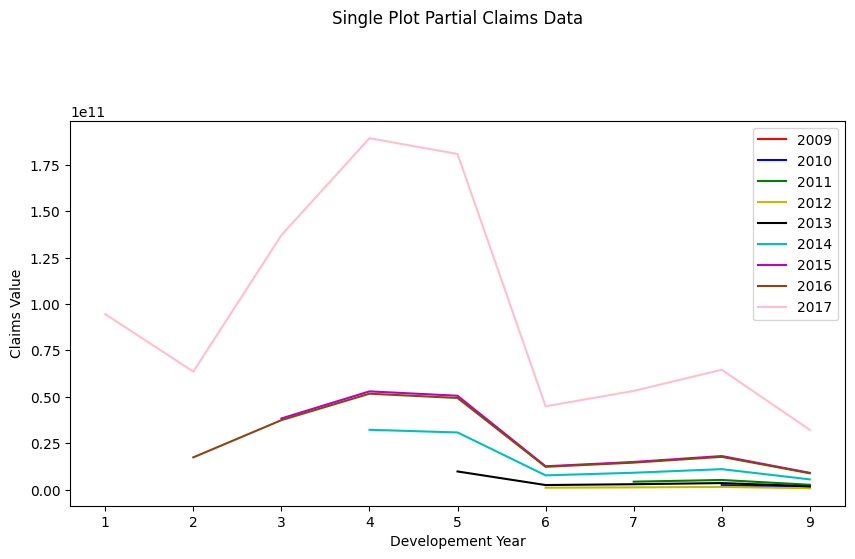

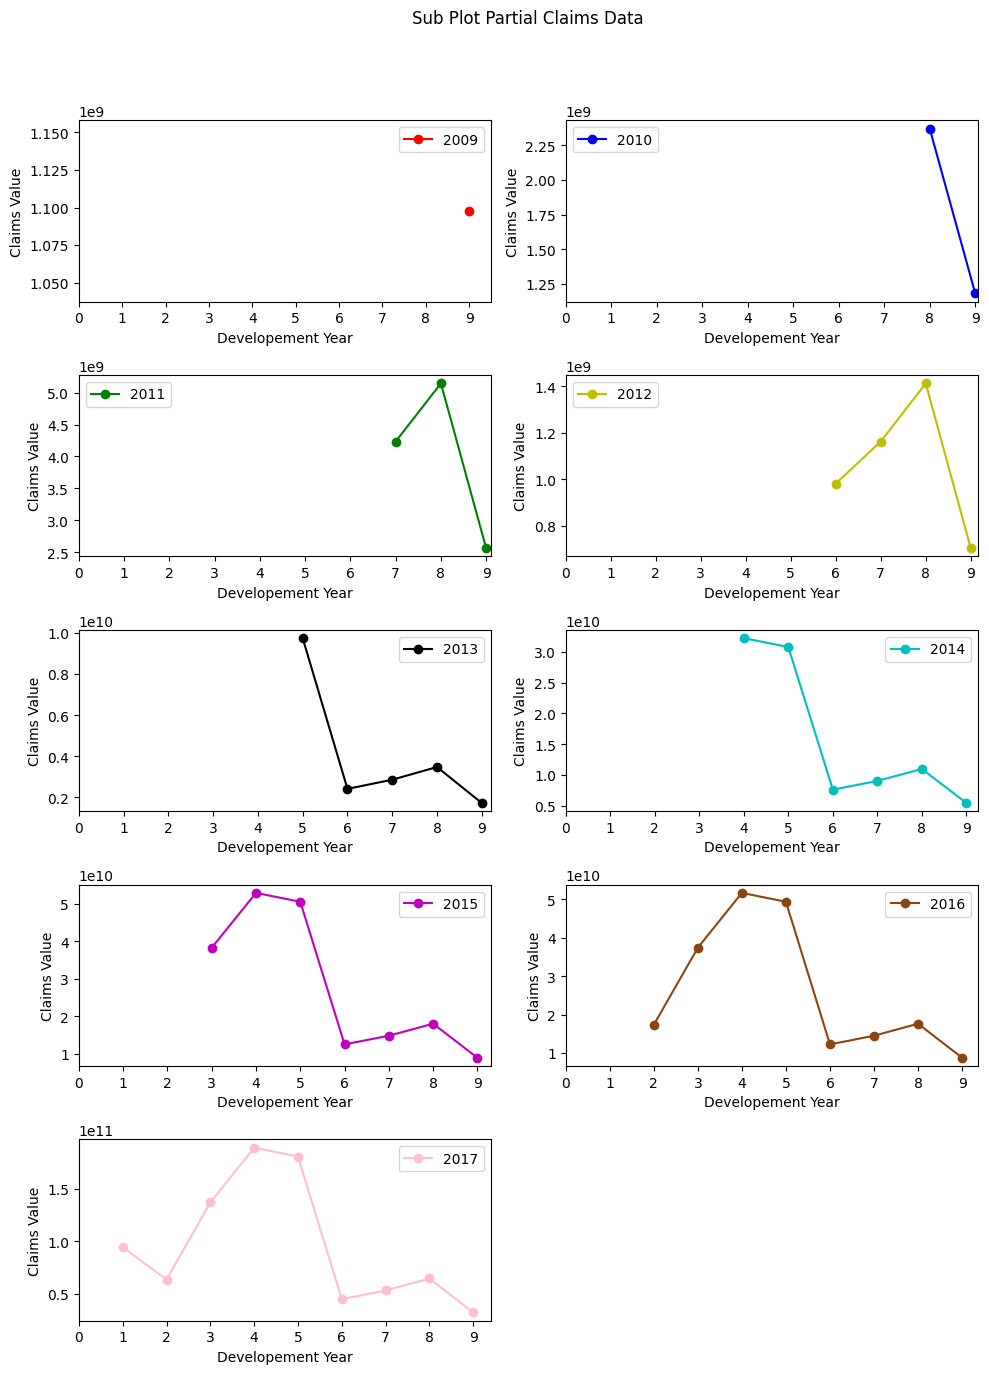

FutureUplifted_Predicted_Inflated_Incremental  \
PredictedYear_Only_Lag                                             1   
InsuredYear                                                            
2009                                                             NaN   
2010                                                             NaN   
2011                                                             NaN   
2012                                                             NaN   
2013                                                             NaN   
2014                                                             NaN   
2015                                                             NaN   
2016                                                             NaN   
2017                                                    9.459517e+10   

                                                                  \
PredictedYear_Only_Lag             2             3             4   
InsuredYear                                                        
2009                             NaN           NaN           NaN   
2010                             NaN           NaN           NaN   
2011                             NaN           NaN           NaN   
2012                             NaN           NaN           NaN   
2013                             NaN           NaN           NaN   
2014                             NaN           NaN  3.222747e+10   
2015                             NaN  3.833390e+10  5.294691e+10   
2016                    1.734871e+10  3.742227e+10  5.168776e+10   
2017                    6.360057e+10  1.371904e+11  1.894879e+11   

                                                                  \
PredictedYear_Only_Lag             5             6             7   
InsuredYear                                                        
2009                             NaN           NaN           NaN   
2010                             NaN           NaN           NaN   
2011                             NaN           NaN  4.234231e+09   
2012                             NaN  9.815381e+08  1.162600e+09   
2013                    9.747870e+09  2.418006e+09  2.864050e+09   
2014                    3.078611e+10  7.636644e+09  9.045356e+09   
2015                    5.057887e+10  1.254633e+10  1.486073e+10   
2016                    4.937604e+10  1.224797e+10  1.450732e+10   
2017                    1.810131e+11  4.490118e+10  5.318399e+10   

                                                    
PredictedYear_Only_Lag             8             9  
InsuredYear                                         
2009                             NaN  1.097657e+09  
2010                    2.370706e+09  1.180521e+09  
2011                    5.145059e+09  2.562044e+09  
2012                    1.412688e+09  7.034647e+08  
2013                    3.480138e+09  1.732976e+09  
2014                    1.099111e+10  5.473154e+09  
2015                    1.805743e+10  8.991912e+09  
2016                    1.762800e+10  8.778071e+09  
2017                    6.462443e+10  3.218051e+10

In [303]:
SinglePlotPartialClaims(DataFrameName=Predicted_df, InsuredYearColumn='InsuredYear', LagYearColumn='PredictedYear_Only_Lag', ValueColumn='FutureUplifted_Predicted_Inflated_Incremental')
SubPlotPartialClaims(DataFrameName=Predicted_df, InsuredYearColumn='InsuredYear', LagYearColumn='PredictedYear_Only_Lag', ValueColumn='FutureUplifted_Predicted_Inflated_Incremental')
display(PredictedInflatedTriangle)


In [304]:
# Cumulative
# Non-Inflated
PredictedCumTriangle = pd.pivot_table(Predicted_df, index=["InsuredYear"], columns=["PredictedYear_Only_Lag"], values=["Predicted_cumsum"])
# Inflated
PredictedInflatedCumTriangle = pd.pivot_table(Predicted_df, index=["InsuredYear"], columns=["PredictedYear_Only_Lag"], values=["Predicted_Inflated_cumsum"])

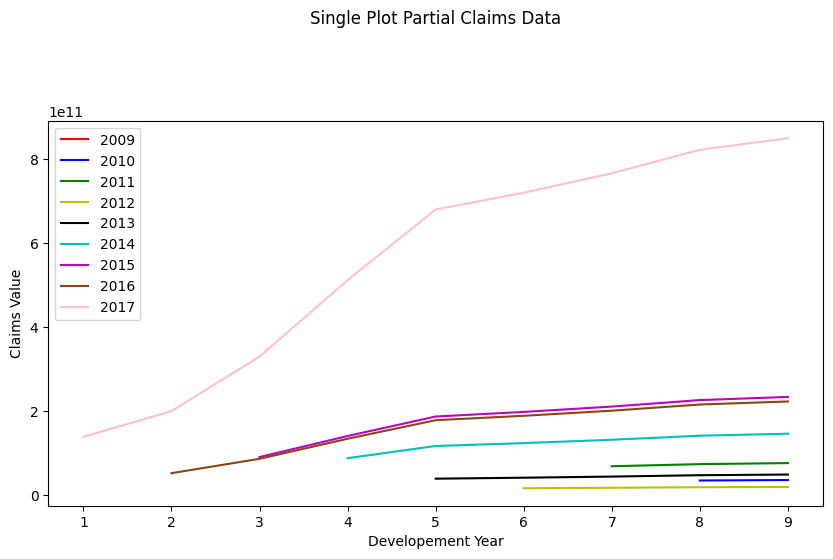

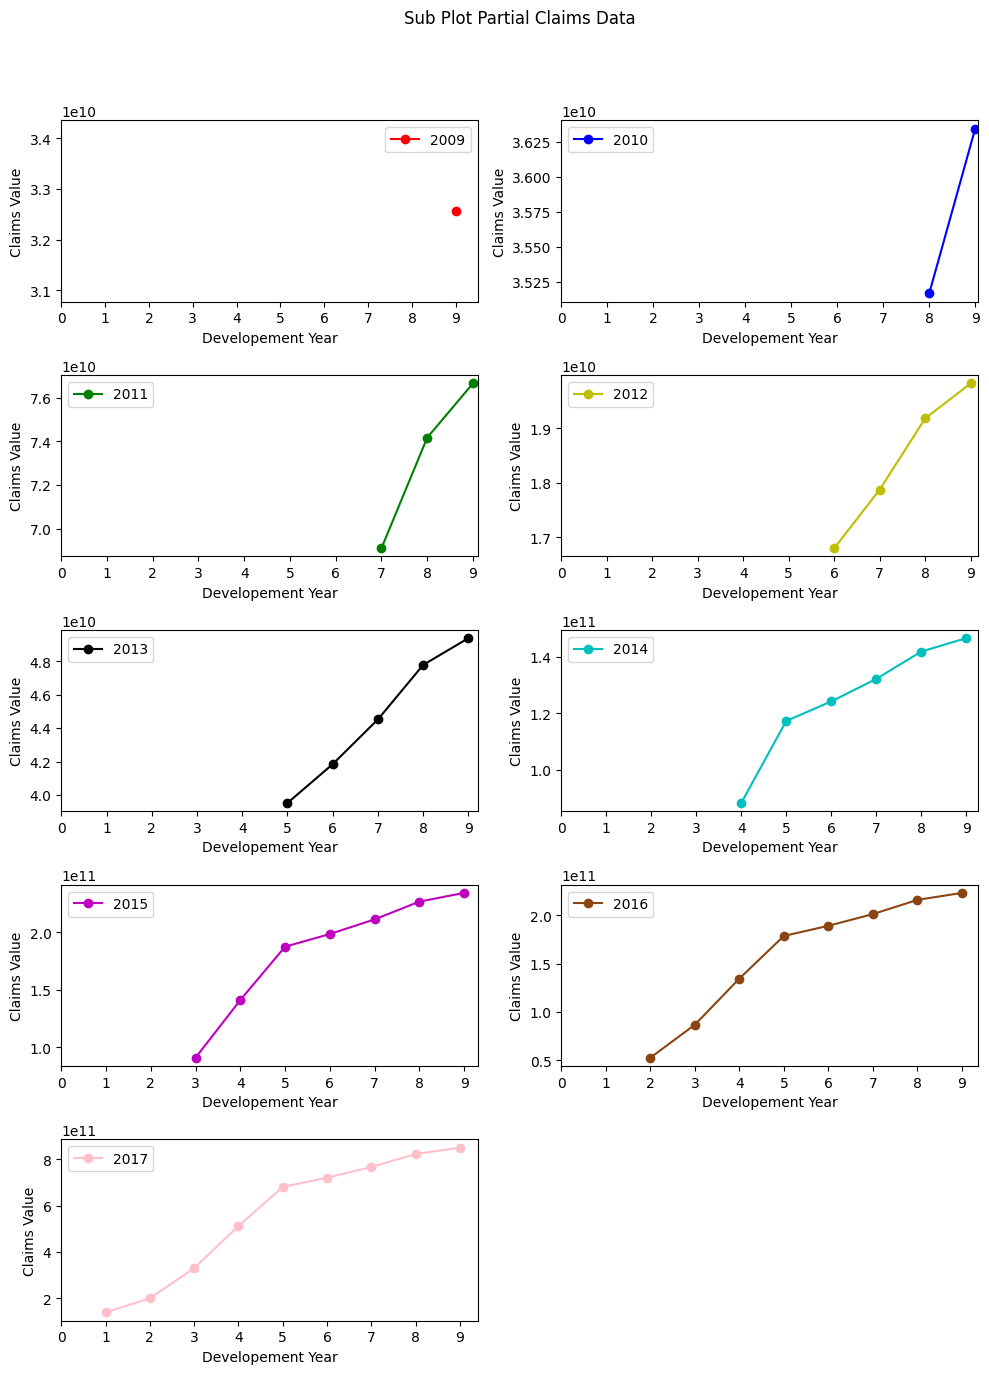

Predicted_cumsum                              \
PredictedYear_Only_Lag                1             2             3   
InsuredYear                                                           
2009                                NaN           NaN           NaN   
2010                                NaN           NaN           NaN   
2011                                NaN           NaN           NaN   
2012                                NaN           NaN           NaN   
2013                                NaN           NaN           NaN   
2014                                NaN           NaN           NaN   
2015                                NaN           NaN  9.102868e+10   
2016                                NaN  5.263858e+10  8.680178e+10   
2017                       1.390534e+11  2.003613e+11  3.303988e+11   

                                                                  \
PredictedYear_Only_Lag             4             5             6   
InsuredYear                                                        
2009                             NaN           NaN           NaN   
2010                             NaN           NaN           NaN   
2011                             NaN           NaN           NaN   
2012                             NaN           NaN  1.680224e+10   
2013                             NaN  3.952177e+10  4.184316e+10   
2014                    8.832372e+10  1.173292e+11  1.242208e+11   
2015                    1.411281e+11  1.874746e+11  1.984863e+11   
2016                    1.345749e+11  1.787693e+11  1.892697e+11   
2017                    5.122404e+11  6.804601e+11  7.204283e+11   

                                                                  
PredictedYear_Only_Lag             7             8             9  
InsuredYear                                                       
2009                             NaN           NaN  3.256629e+10  
2010                             NaN  3.516487e+10  3.634211e+10  
2011                    6.911570e+10  7.416949e+10  7.665251e+10  
2012                    1.787846e+10  1.918575e+10  1.982804e+10  
2013                    4.452331e+10  4.777888e+10  4.937841e+10  
2014                    1.321774e+11  1.418423e+11  1.465909e+11  
2015                    2.111998e+11  2.266429e+11  2.342304e+11  
2016                    2.013928e+11  2.161188e+11  2.233539e+11  
2017                    7.665733e+11  8.226256e+11  8.501653e+11

In [305]:
SinglePlotPartialClaims(DataFrameName=Predicted_df, InsuredYearColumn='InsuredYear', LagYearColumn='PredictedYear_Only_Lag', ValueColumn='Predicted_cumsum')
SubPlotPartialClaims(DataFrameName=Predicted_df, InsuredYearColumn='InsuredYear', LagYearColumn='PredictedYear_Only_Lag', ValueColumn='Predicted_cumsum')
display(PredictedCumTriangle)

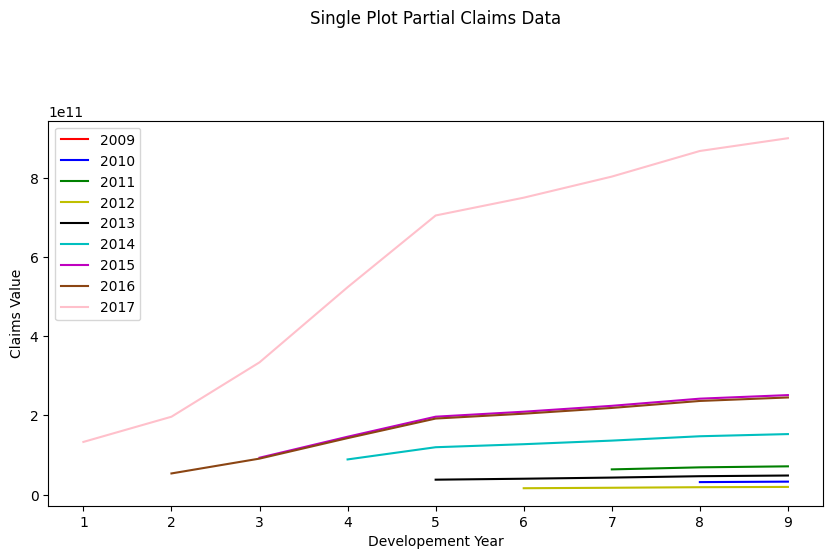

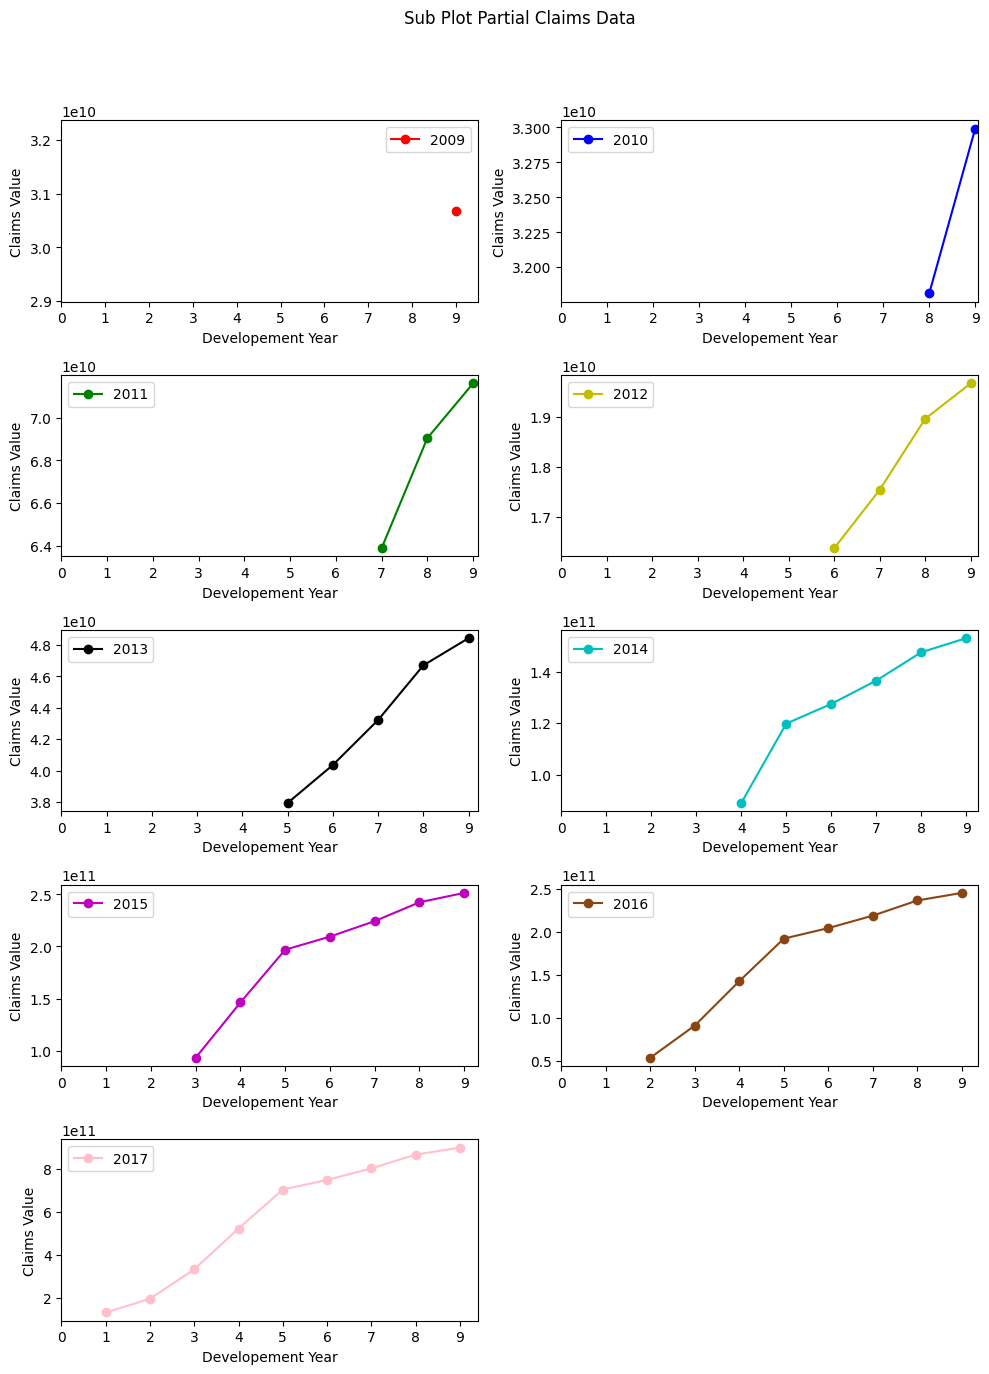

Predicted_Inflated_cumsum                              \
PredictedYear_Only_Lag                         1             2             3   
InsuredYear                                                                    
2009                                         NaN           NaN           NaN   
2010                                         NaN           NaN           NaN   
2011                                         NaN           NaN           NaN   
2012                                         NaN           NaN           NaN   
2013                                         NaN           NaN           NaN   
2014                                         NaN           NaN           NaN   
2015                                         NaN           NaN  9.331138e+10   
2016                                         NaN  5.367004e+10  9.109231e+10   
2017                                1.331544e+11  1.967550e+11  3.339454e+11   

                                                                  \
PredictedYear_Only_Lag             4             5             6   
InsuredYear                                                        
2009                             NaN           NaN           NaN   
2010                             NaN           NaN           NaN   
2011                             NaN           NaN           NaN   
2012                             NaN           NaN  1.638071e+10   
2013                             NaN  3.793566e+10  4.035367e+10   
2014                    8.902380e+10  1.198099e+11  1.274466e+11   
2015                    1.462583e+11  1.968372e+11  2.093835e+11   
2016                    1.427801e+11  1.921561e+11  2.044041e+11   
2017                    5.234333e+11  7.044464e+11  7.493476e+11   

                                                                  
PredictedYear_Only_Lag             7             8             9  
InsuredYear                                                       
2009                             NaN           NaN  3.067579e+10  
2010                             NaN  3.181106e+10  3.299159e+10  
2011                    6.389337e+10  6.903842e+10  7.160047e+10  
2012                    1.754331e+10  1.895600e+10  1.965946e+10  
2013                    4.321772e+10  4.669786e+10  4.843083e+10  
2014                    1.364919e+11  1.474830e+11  1.529562e+11  
2015                    2.242442e+11  2.423017e+11  2.512936e+11  
2016                    2.189114e+11  2.365394e+11  2.453175e+11  
2017                    8.025316e+11  8.671560e+11  8.993365e+11

In [306]:
SinglePlotPartialClaims(DataFrameName=Predicted_df, InsuredYearColumn='InsuredYear', LagYearColumn='PredictedYear_Only_Lag', ValueColumn='Predicted_Inflated_cumsum')
SubPlotPartialClaims(DataFrameName=Predicted_df, InsuredYearColumn='InsuredYear', LagYearColumn='PredictedYear_Only_Lag', ValueColumn='Predicted_Inflated_cumsum')
display(PredictedInflatedCumTriangle)

In [307]:
def SinglePlotFullClaims(PastDataFrameName, PastInsuredYearColumn, PastLagYearColumn, PastValueColumn, 
                   FutureDataFrameName, FutureInsuredYearColumn, FutureLagYearColumn, FutureValueColumn):
    import matplotlib.pyplot as plt
    from matplotlib import rcParams
    # https://stackoverflow.com/questions/16419670/increase-distance-between-title-and-plot-in-matplolib
    """Create New df"""
    Filtered_NewColumnNames = ["Insured_Year","Year_Only_Lag","ClaimAmt"]
    # Past
    Past_Filtered_df = pd.DataFrame(PastDataFrameName[[PastInsuredYearColumn, PastLagYearColumn, PastValueColumn]])
    Past_Filtered_df.columns = Filtered_NewColumnNames
    # Future
    Future_Filtered_df = pd.DataFrame(FutureDataFrameName[[FutureInsuredYearColumn, FutureLagYearColumn, FutureValueColumn]])
    Future_Filtered_df.columns = Filtered_NewColumnNames    
    """Unique Insured Years List"""
    # Past
    Past_InsuredYr_List = list(PastDataFrameName[PastInsuredYearColumn].unique())
    # Future
    Future_InsuredYr_List = list(FutureDataFrameName[FutureInsuredYearColumn].unique())
    """Unique Lag Years List"""
    # Past
    Past_LagYr_List = list(PastDataFrameName[PastLagYearColumn].unique())
    # Future
    Future_LagYr_List = list(FutureDataFrameName[FutureLagYearColumn].unique())
    """Color List"""
    ALL_Colors = ['r','b','g','y','k', 'c', 'm', 'saddlebrown', 'pink', 'lawngreen']         
    Past_Color_List = ALL_Colors[:len(Past_InsuredYr_List)]
    Future_Color_List = ALL_Colors[:len(Future_InsuredYr_List)]
    """Plotting"""
    fig = plt.figure(2, figsize=(8,12))
    plt.title('Single Plot Full Claims Data')
    """Full Loop Plot"""
    Full_Filtered_df = pd.concat([Past_Filtered_df, Future_Filtered_df])
    for row_A in range(0,len(Past_InsuredYr_List)):
        Year_i = Past_InsuredYr_List[row_A]
        Full_SubFiltered_df = Full_Filtered_df.loc[Full_Filtered_df['Insured_Year'].isin([Year_i])]
        plt.plot(Full_SubFiltered_df['Year_Only_Lag'], Full_SubFiltered_df['ClaimAmt'], 
                 label=('Predicted %d' % Year_i), linestyle='--', color=Past_Color_List[row_A])
        plt.legend()
        plt.xlabel('Developement Year')
        plt.ylabel('Claims Value')    
    """Past Loop Plot"""
    for row_A in range(0,len(Past_InsuredYr_List)):
        Year_i = Past_InsuredYr_List[row_A]
        Past_SubFiltered_df = Past_Filtered_df.loc[Past_Filtered_df['Insured_Year'].isin([Year_i])]
        plt.plot(Past_SubFiltered_df['Year_Only_Lag'], Past_SubFiltered_df['ClaimAmt'], 
                 label=('Historical %d' % Year_i), linestyle='-', color=Past_Color_List[row_A], marker='o')
        plt.legend()
    #"""Future Loop Plot"""
    for row_B in range(0,len(Future_InsuredYr_List)):
       Year_i = Future_InsuredYr_List[row_B]
       Future_SubFiltered_df = Future_Filtered_df.loc[Future_Filtered_df['Insured_Year'].isin([Year_i])]
       plt.plot(Future_SubFiltered_df['Year_Only_Lag'], Future_SubFiltered_df['ClaimAmt'], 
                label=str(Year_i), linestyle='--', color=Future_Color_List[row_B])    
    
    """Plot Attributes"""    
    plt.show()

In [308]:
def SubPlotFullClaims(PastDataFrameName, PastInsuredYearColumn, PastLagYearColumn, PastValueColumn, 
                   FutureDataFrameName, FutureInsuredYearColumn, FutureLagYearColumn, FutureValueColumn):
    import matplotlib.pyplot as plt
    from matplotlib import rcParams
    # https://stackoverflow.com/questions/16419670/increase-distance-between-title-and-plot-in-matplolib
    """Create New df"""
    Filtered_NewColumnNames = ["Insured_Year","Year_Only_Lag","ClaimAmt"]
    # Past
    Past_Filtered_df = pd.DataFrame(PastDataFrameName[[PastInsuredYearColumn, PastLagYearColumn, PastValueColumn]])
    Past_Filtered_df.columns = Filtered_NewColumnNames
    # Future
    Future_Filtered_df = pd.DataFrame(FutureDataFrameName[[FutureInsuredYearColumn, FutureLagYearColumn, FutureValueColumn]])
    Future_Filtered_df.columns = Filtered_NewColumnNames    
    """Unique Insured Years List"""
    # Past
    Past_InsuredYr_List = list(PastDataFrameName[PastInsuredYearColumn].unique())
    # Future
    Future_InsuredYr_List = list(FutureDataFrameName[FutureInsuredYearColumn].unique())
    """Unique Lag Years List"""
    # Past
    Past_LagYr_List = list(PastDataFrameName[PastLagYearColumn].unique())
    # Future
    Future_LagYr_List = list(FutureDataFrameName[FutureLagYearColumn].unique())
    """Color List"""
    ALL_Colors = ['r','b','g','y','k', 'c', 'm', 'saddlebrown', 'pink', 'lawngreen']         
    Past_Color_List = ALL_Colors[:len(Past_InsuredYr_List)]
    Future_Color_List = ALL_Colors[:len(Future_InsuredYr_List)]
    """Plotting"""
    fig = plt.figure(2, figsize=(12,16))
    plt.xticks([]) # remove initial blank plot default ticks
    plt.yticks([]) # remove initial blank plot default ticks
    plt.title('Sub Plot Full Claims Data')
    rcParams['axes.titlepad'] = 50 # position title
    plt.box(on=None) # Remove boundary line
    """Full Loop Plot"""
    Full_Filtered_df = pd.concat([Past_Filtered_df, Future_Filtered_df])
    i=0
    for row_A in range(0,len(Past_InsuredYr_List)):
        ax = fig.add_subplot(5, 2, 1+i)
        Year_i = Past_InsuredYr_List[row_A]
        Full_SubFiltered_df = Full_Filtered_df.loc[Full_Filtered_df['Insured_Year'].isin([Year_i])]
        plt.plot(Full_SubFiltered_df['Year_Only_Lag'], Full_SubFiltered_df['ClaimAmt'], 
                 label=('Predicted %d' % Year_i), linestyle='--', color=Past_Color_List[row_A])
        plt.legend()
        i += 1
        plt.xticks(np.arange(0, (YearEndCap-YearStartCap), step=1))
        plt.xlabel('Developement Year')
        plt.ylabel('Claims Value') 
    """Past Loop Plot"""
    i=0
    for row_A in range(0,len(Past_InsuredYr_List)):
        ax = fig.add_subplot(5, 2, 1+i)
        Year_i = Past_InsuredYr_List[row_A]
        Past_SubFiltered_df = Past_Filtered_df.loc[Past_Filtered_df['Insured_Year'].isin([Year_i])]
        plt.plot(Past_SubFiltered_df['Year_Only_Lag'], Past_SubFiltered_df['ClaimAmt'], 
                 label=('Historical %d' % Year_i), linestyle='-', color=Past_Color_List[row_A], marker='o')
        plt.legend()
        i += 1
    #"""Future Loop Plot"""
    for row_B in range(0,len(Future_InsuredYr_List)):
       Year_i = Future_InsuredYr_List[row_B]
       Future_SubFiltered_df = Future_Filtered_df.loc[Future_Filtered_df['Insured_Year'].isin([Year_i])]
       plt.plot(Future_SubFiltered_df['Year_Only_Lag'], Future_SubFiltered_df['ClaimAmt'], 
                label=str(Year_i), linestyle='--', color=Future_Color_List[row_B])    
    """Plot Attributes"""    
    fig.tight_layout()
    plt.show()

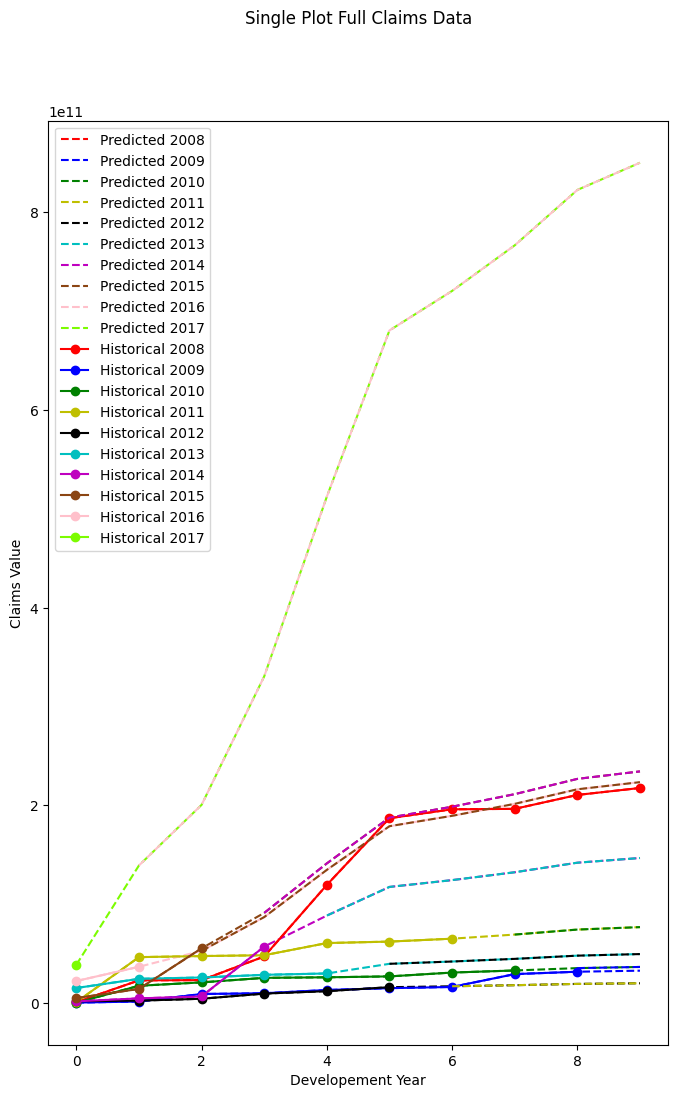

In [309]:
SinglePlotFullClaims(PastDataFrameName=py_data, PastInsuredYearColumn="Insured_Year", PastLagYearColumn="Year_Only_Lag", PastValueColumn="cumsum", 
               FutureDataFrameName=Predicted_df, FutureInsuredYearColumn="InsuredYear", FutureLagYearColumn="PredictedYear_Only_Lag", FutureValueColumn="Predicted_cumsum")

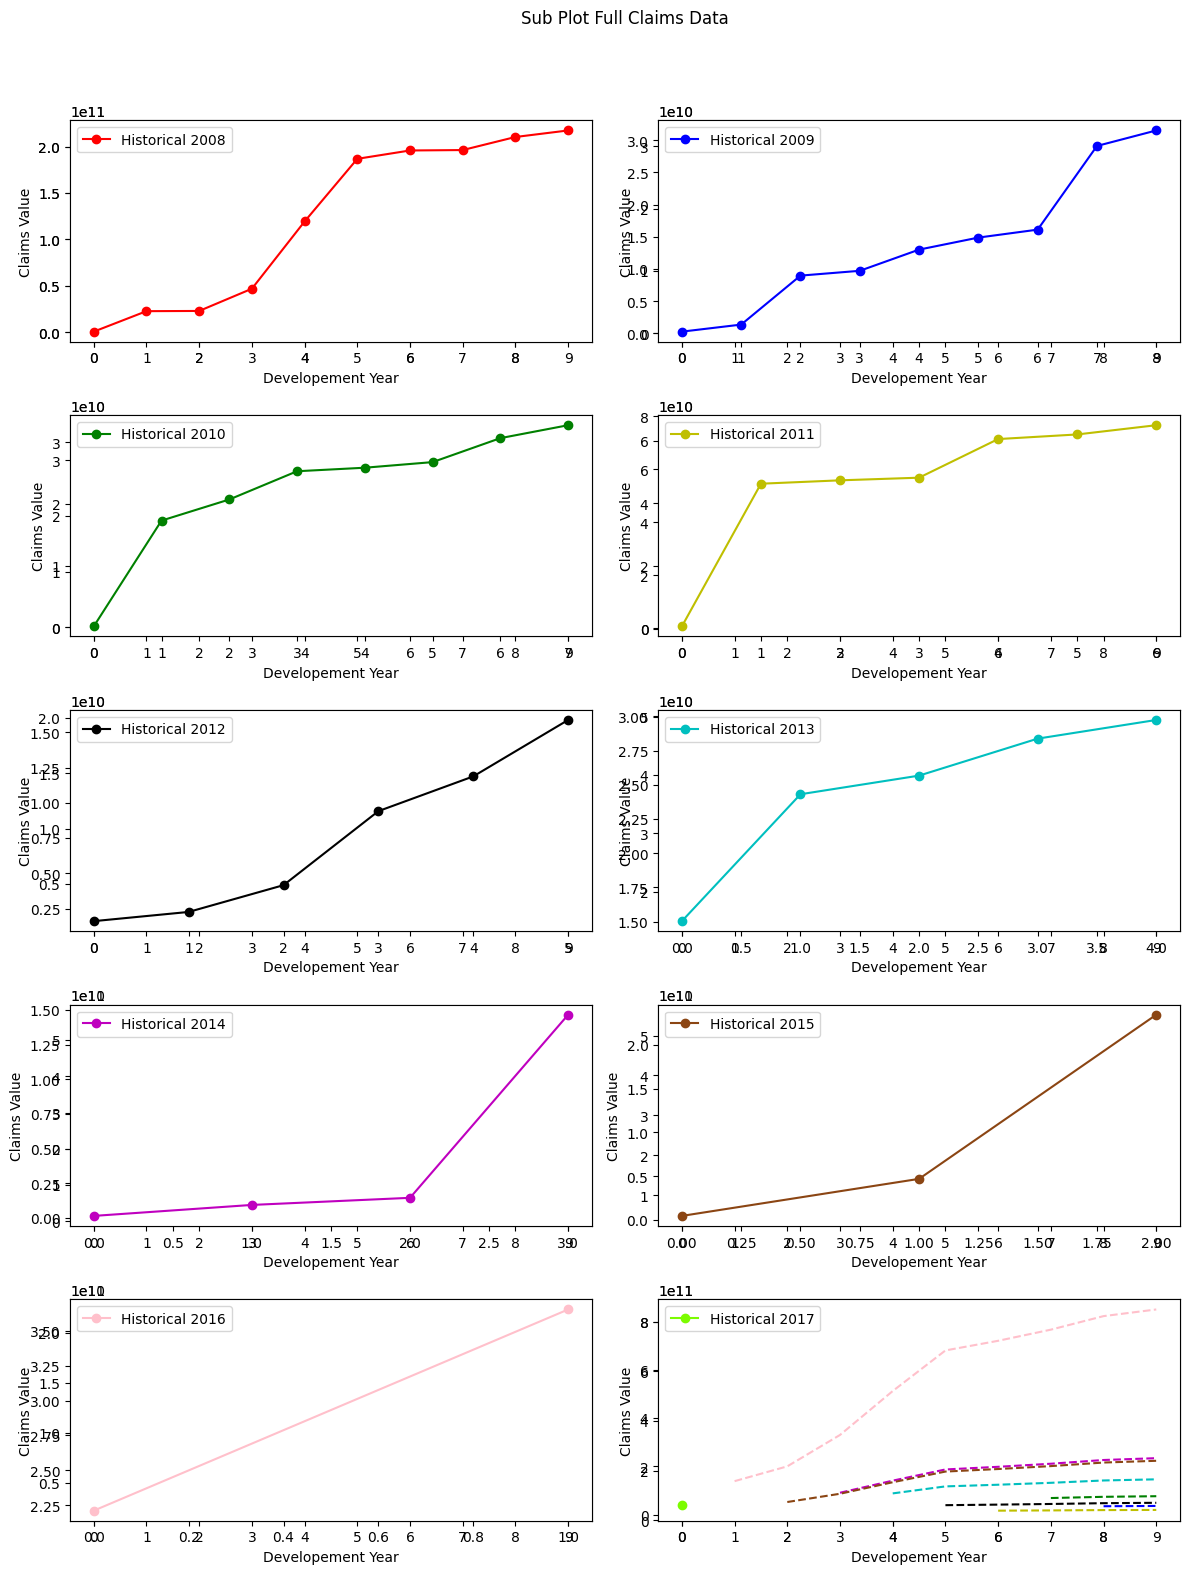

In [310]:
SubPlotFullClaims(PastDataFrameName=py_data, PastInsuredYearColumn="Insured_Year", PastLagYearColumn="Year_Only_Lag", PastValueColumn="cumsum", 
               FutureDataFrameName=Predicted_df, FutureInsuredYearColumn="InsuredYear", FutureLagYearColumn="PredictedYear_Only_Lag", FutureValueColumn="Predicted_cumsum")

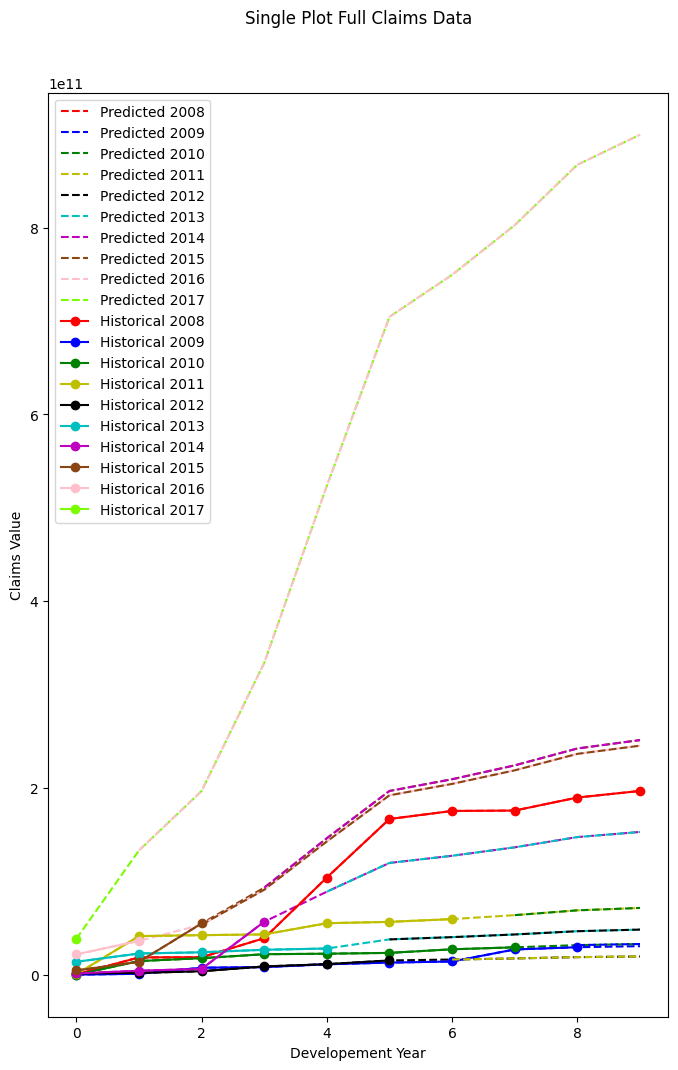

In [311]:
SinglePlotFullClaims(PastDataFrameName=py_data, PastInsuredYearColumn="Insured_Year", PastLagYearColumn="Year_Only_Lag", PastValueColumn="Inflated_cumsum", 
               FutureDataFrameName=Predicted_df, FutureInsuredYearColumn="InsuredYear", FutureLagYearColumn="PredictedYear_Only_Lag", FutureValueColumn="Predicted_Inflated_cumsum")

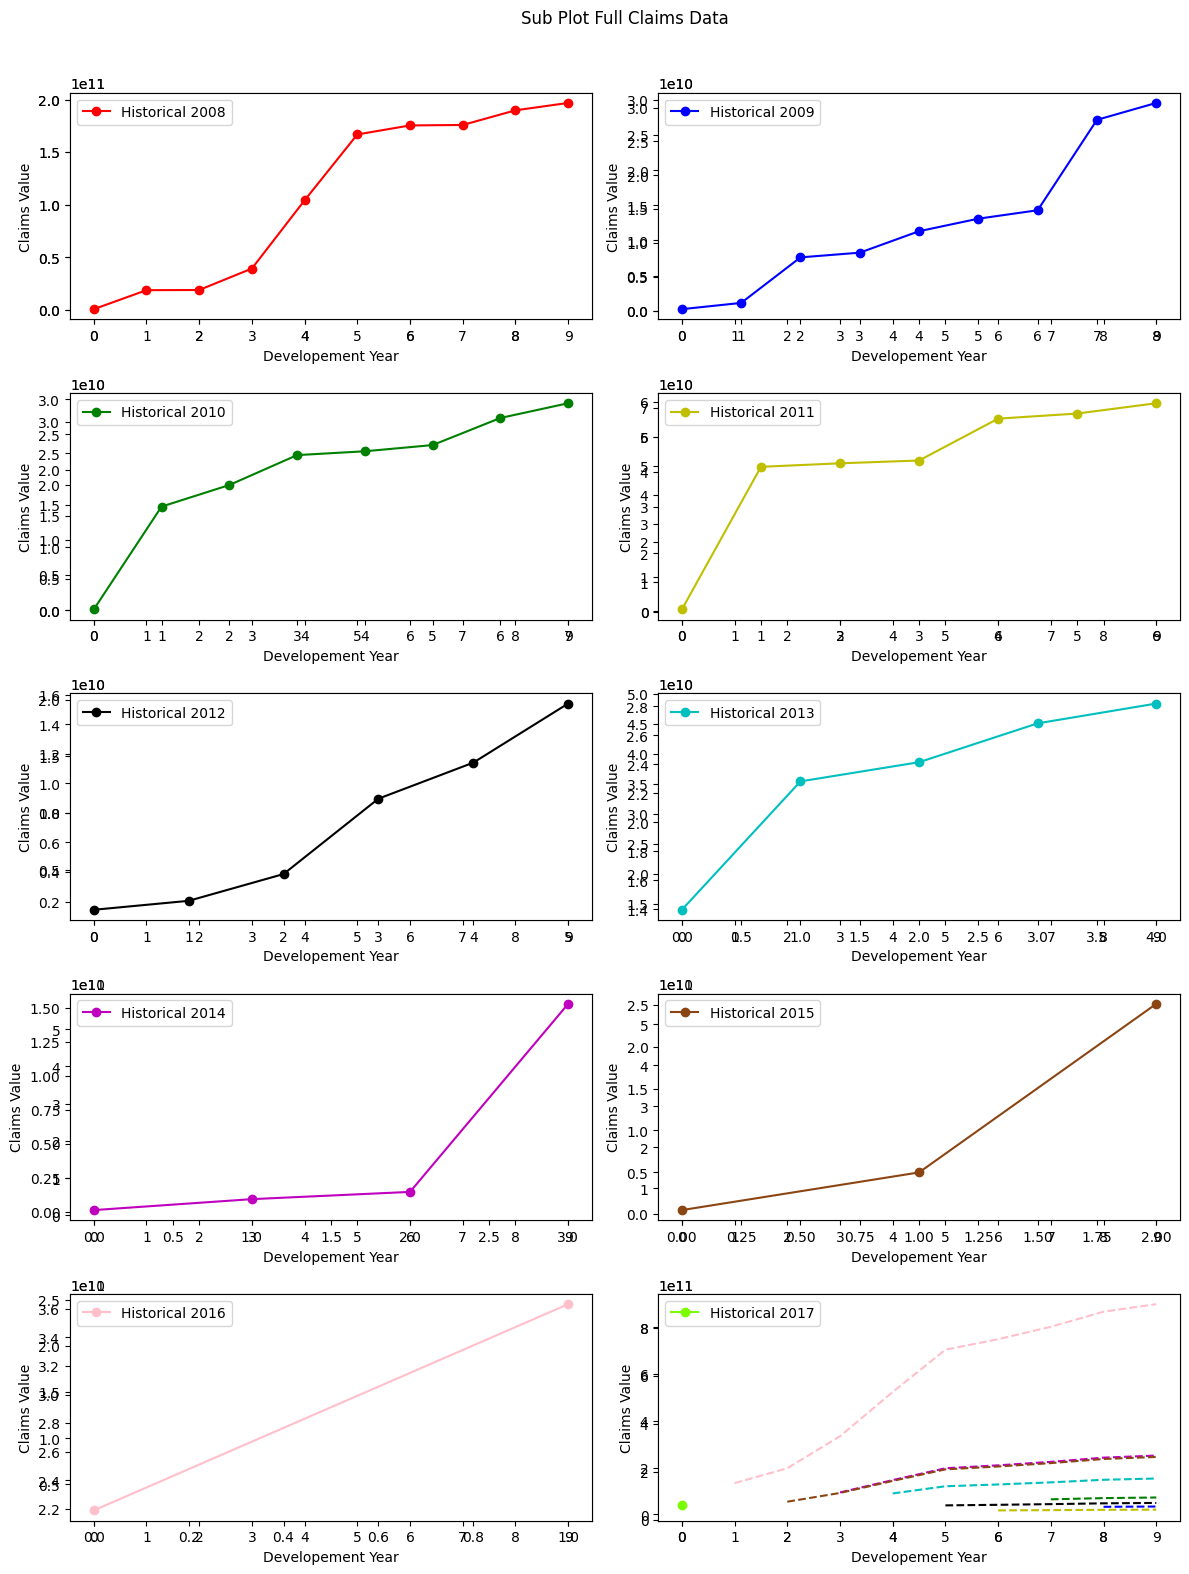

In [312]:
SubPlotFullClaims(PastDataFrameName=py_data, PastInsuredYearColumn="Insured_Year", PastLagYearColumn="Year_Only_Lag", PastValueColumn="Inflated_cumsum", 
               FutureDataFrameName=Predicted_df, FutureInsuredYearColumn="InsuredYear", FutureLagYearColumn="PredictedYear_Only_Lag", FutureValueColumn="Predicted_Inflated_cumsum")

In [313]:
InflatedReserves = Predicted_df['FutureUplifted_Predicted_Inflated_Incremental'].sum()
print(InflatedReserves)

1403342896444.3362


In [314]:
NonInflatedReserves = Predicted_df['FutureUplifted_Predicted_Incremental'].sum()
print(NonInflatedReserves)

1306988559571.0967


In [315]:
PercDiff = 100*(InflatedReserves/NonInflatedReserves-1)
print('Percentage Difference {}'.format(PercDiff))

Percentage Difference 7.372240266958374
